## import os for  operating system operations e.g., creating a folder

In [1]:
import os

## Tensorflow and keras are two packages for creating neural network models.

In [2]:

import tensorflow as tf
from tensorflow import keras

## For splitting our dataset into training and test set

In [3]:

from sklearn.model_selection import train_test_split

## print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [4]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [5]:
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

## Read dataset

In [6]:

dataset = pd.read_csv('dataset.csv')

## display dataset

In [7]:
dataset.head()

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,JAN-16',33.4,17.7,160,1.9,47.2,25,1005.6
1,FEB-16',37.0,20.8,220,1.4,50.3,26,1005.0
2,MAR-16',41.0,26.1,250,1.1,63.9,28,1003.1
3,APR-16',40.7,29.0,270,2.7,32.1,52,1003.4
4,MAY-16',36.7,26.8,210,2.6,66.2,75,1005.4


## dataset characteristics

In [8]:
true_values=dataset['WIND-SPEED']


In [9]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,34.803030,23.318182,185.454545,2.121212,48.207576,51.257576,1006.287879
std,3.308449,3.230523,56.546287,0.793728,16.390328,22.489184,2.018111
min,28.500000,13.900000,60.000000,0.800000,18.900000,11.000000,1002.300000
25%,31.800000,20.875000,150.000000,1.525000,33.300000,29.250000,1005.325000
50%,34.350000,24.000000,190.000000,2.000000,47.600000,53.500000,1006.550000
75%,36.975000,25.300000,240.000000,2.600000,61.350000,71.750000,1007.975000
max,41.100000,29.400000,270.000000,4.600000,98.300000,82.000000,1010.000000


## Check for null and NaN values

In [10]:

dataset.isna().sum()

DATE                   0
MAXIMUM-TEMPERATURE    0
MINIMUM-TEMPERATURE    0
WIND-DIRECTION         0
WIND-SPEED             0
WIND-RUN               0
RELATIVE-HUMIDITY      0
AIR-PRESSURE           0
dtype: int64

## copy dataset

In [11]:

df = dataset.copy()

## remove the date column

In [12]:

df.drop('DATE',axis='columns',inplace=True)

In [13]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.4,17.7,160,1.9,47.2,25,1005.6
1,37.0,20.8,220,1.4,50.3,26,1005.0
2,41.0,26.1,250,1.1,63.9,28,1003.1
3,40.7,29.0,270,2.7,32.1,52,1003.4
4,36.7,26.8,210,2.6,66.2,75,1005.4
...,...,...,...,...,...,...,...
61,36.0,22.4,170,3.4,63.7,26,1006.9
62,39.7,26.1,220,2.1,73.7,35,1005.6
63,39.7,28.8,200,4.6,84.2,65,1002.6
64,35.6,25.3,130,2.6,98.3,75,1005.4


In [14]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (66, 7)


In [15]:

def scaling_func(df,cols_to_scale):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    return df

## Summary of information on the dataset.

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  66 non-null     float64
 1   MINIMUM-TEMPERATURE  66 non-null     float64
 2   WIND-DIRECTION       66 non-null     int64  
 3   WIND-SPEED           66 non-null     float64
 4   WIND-RUN             66 non-null     float64
 5   RELATIVE-HUMIDITY    66 non-null     int64  
 6   AIR-PRESSURE         66 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.7 KB


## Split the data into train/test splits

### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [17]:

X = df.drop('WIND-SPEED',axis='columns')
y = df['WIND-SPEED']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=5)

In [18]:
X_train.shape

(39, 6)

In [19]:
y_train.shape

(39,)

In [20]:
X_test.shape

(27, 6)

In [21]:
y_test.shape

(27,)

## Plot the relationship between each two variables to spot anything incorrect.

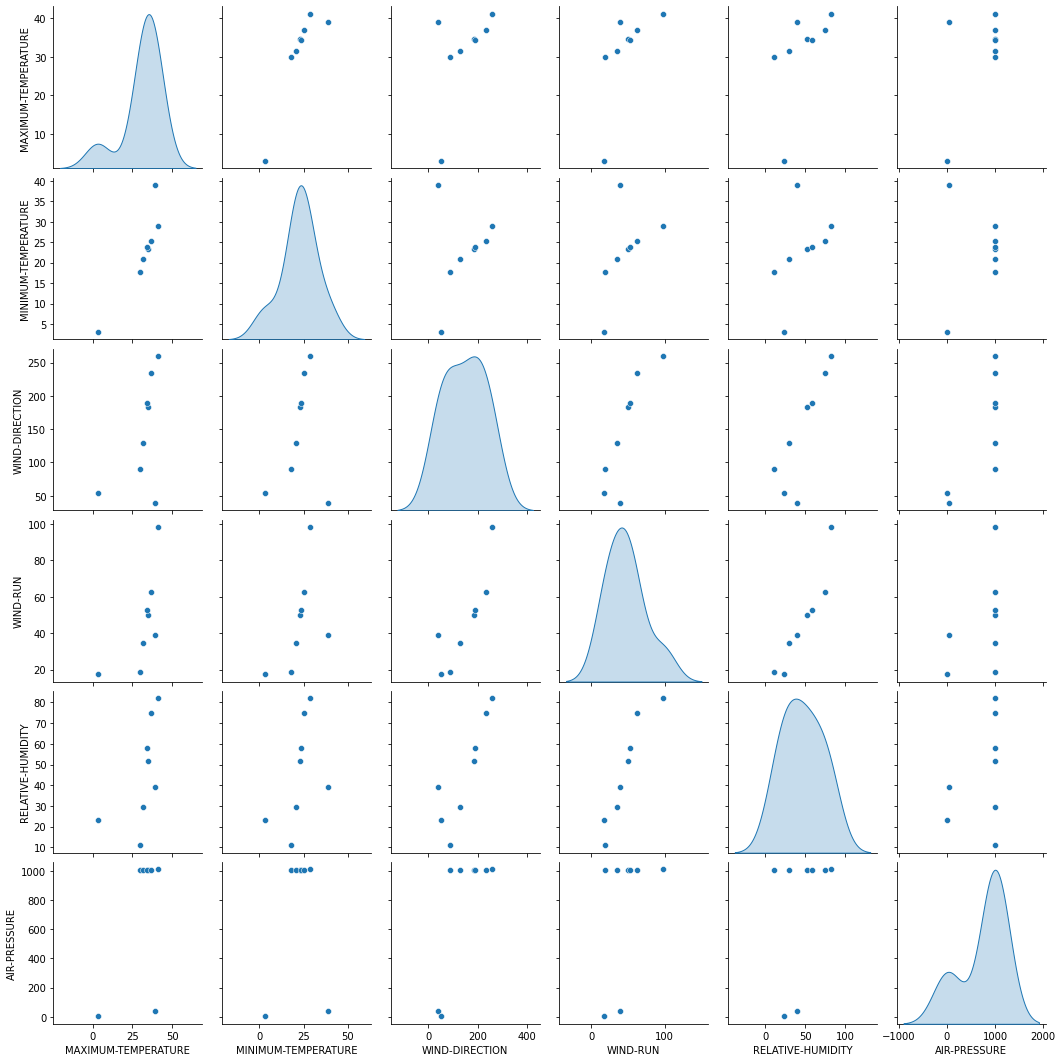

In [22]:

train_stats = X_train.describe()
sns.pairplot(train_stats[X_train.columns], diag_kind="kde") # or diag_kind='reg'

## Statistics on the train dataset to make sure it in a good shape

In [23]:

train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MAXIMUM-TEMPERATURE,39.0,34.666667,3.096631,30.0,31.60,34.3,36.85,41.1
MINIMUM-TEMPERATURE,39.0,23.266667,3.083174,17.7,20.80,23.8,25.30,28.9
WIND-DIRECTION,39.0,183.333333,53.721178,90.0,130.00,190.0,235.00,260.0
WIND-RUN,39.0,50.246154,17.484216,18.9,34.55,52.8,62.55,98.3
RELATIVE-HUMIDITY,39.0,51.871795,23.031077,11.0,29.50,58.0,75.00,82.0
AIR-PRESSURE,39.0,1006.197436,1.983416,1002.3,1005.20,1006.3,1007.85,1009.7


In [24]:

X_train.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
52,37.7,27.2,240,52.8,61,1005.7
19,31.2,24.1,110,55.7,81,1008.7
40,34.3,22.0,210,31.6,43,1004.7
32,31.5,24.2,130,61.2,78,1008.0
65,32.8,23.8,160,18.9,77,1007.6
4,36.7,26.8,210,66.2,75,1005.4
37,31.6,22.4,100,36.3,11,1005.6
0,33.4,17.7,160,47.2,25,1005.6
5,33.8,25.3,260,61.4,75,1008.2
14,41.1,25.3,240,47.8,34,1004.0


In [25]:
cols_to_scale = ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-DIRECTION','WIND-RUN','RELATIVE-HUMIDITY','AIR-PRESSURE']
X_train = scaling_func(X_train,cols_to_scale)
X_test = scaling_func(X_test,cols_to_scale)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [26]:
X_train.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
52,0.693694,0.848214,0.882353,0.426952,0.704225,0.459459
19,0.108108,0.571429,0.117647,0.463476,0.985915,0.864865
40,0.387387,0.383929,0.705882,0.159950,0.450704,0.324324
32,0.135135,0.580357,0.235294,0.532746,0.943662,0.770270
65,0.252252,0.544643,0.411765,0.000000,0.929577,0.716216
4,0.603604,0.812500,0.705882,0.595718,0.901408,0.418919
37,0.144144,0.419643,0.058824,0.219144,0.000000,0.445946
0,0.306306,0.000000,0.411765,0.356423,0.197183,0.445946
5,0.342342,0.678571,1.000000,0.535264,0.901408,0.797297
14,1.000000,0.678571,0.882353,0.363980,0.323944,0.229730


In [27]:
X_test.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
34,0.672,0.496774,0.333333,0.268817,0.617647,0.506667
26,0.944,0.838710,0.619048,0.707527,0.338235,0.000000
35,0.432,0.361290,0.476190,0.000000,0.235294,0.733333
21,0.528,0.703226,0.761905,0.012903,0.852941,0.413333
10,0.672,0.522581,0.857143,0.860215,0.485294,0.653333
23,0.560,0.400000,0.190476,0.154839,0.294118,0.453333
24,0.392,0.296774,0.476190,0.550538,0.191176,0.600000
62,0.896,0.787097,0.761905,1.000000,0.323529,0.413333
33,0.536,0.703226,0.857143,0.234409,0.838235,0.533333
43,0.000,0.419355,0.000000,0.225806,0.852941,0.800000


## Build a Neural Network Model

### We declared a function for creating a model.

In [28]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer=keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [29]:
model1 = model1_single_layer_perceptron()

## import NN and other components.

In [30]:
def model2_multilayer_perceptron_with_one_hidden_layer():

    model = keras.Sequential([
         keras.layers.Dense(5,input_shape=(6,),activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(5, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(1)
     ])
        
    model.compile(loss='mse',optimizer=keras.optimizers.RMSprop(0.001), metrics=['mae','mse','mape'])
    return model


In [31]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()

In [32]:
def model3_multilayer_perceptron_with_two_hidden_layer():
     
    model = keras.Sequential([
         keras.layers.Dense(15,input_shape=(6,),activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(25, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(65, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(1)
     ])
        
    model.compile(loss='mse',optimizer=keras.optimizers.RMSprop(0.001), metrics=['mae','mse','mape'])
    return model

In [33]:
model3 = model3_multilayer_perceptron_with_two_hidden_layer()


## Test the model before training (this will use the initial weights)

In [34]:
loss,mae,mse,mape=model1.evaluate(X_test,y_test)
print(f'loss:{loss},mae:{mae},mse:{mse},mape:{mape}')

1/1 [==============================] - 1s 1s/step - loss: 1.7680 - mae: 1.1401 - mse: 1.7680 - mape: 56.8958
loss:1.7680273056030273,mae:1.140117883682251,mse:1.7680273056030273,mape:56.89580535888672


In [35]:


example_result = model1.predict(X_test) # Here we are using the single layer perceptron model


## Compare the Actual Values with the Predicted Values

In [36]:
print('Predicted Values')
print(example_result[:10].reshape(-1))
print()
print('Actual Values')
print(y_train[:10].to_string(index=False))

Predicted Values
[0.67818254 1.3435699  0.73384726 0.33013418 1.4870641  0.6732212
 1.0845363  1.7970004  0.61208034 0.03587955]

Actual Values
2.1
2.2
3.3
2.3
3.6
2.6
3.2
1.9
2.5
1.3


## Training the model we built above.

### Training the single layer perceptron

In [37]:
model1.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 8ms/step - loss: 3.1610 - mae: 1.5673 - mse: 3.1610 - mape: 64.0767
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.1015 - mae: 1.5481 - mse: 3.1015 - mape: 63.1189
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.0585 - mae: 1.5352 - mse: 3.0585 - mape: 62.5029
Epoch 4/1000
2/2 [==============================] - 0s 0s/step - loss: 3.0196 - mae: 1.5228 - mse: 3.0196 - mape: 61.8925
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.9905 - mae: 1.5141 - mse: 2.9905 - mape: 61.5014
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.9627 - mae: 1.5059 - mse: 2.9627 - mape: 61.1504
Epoch 7/1000
2/2 [==============================] - 0s 0s/step - loss: 2.9331 - mae: 1.4971 - mse: 2.9331 - mape: 60.7570
Epoch 8/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.9041 - mae: 1.4878 - mse: 2.9041 - mape: 60.3226
Epoch 9/1000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 1.8170 - mae: 1.1212 - mse: 1.8170 - mape: 45.1788
Epoch 68/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.8033 - mae: 1.1165 - mse: 1.8033 - mape: 45.0324
Epoch 69/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7888 - mae: 1.1114 - mse: 1.7888 - mape: 44.8642
Epoch 70/1000
2/2 [==============================] - 0s 0s/step - loss: 1.7748 - mae: 1.1068 - mse: 1.7748 - mape: 44.7370
Epoch 71/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7617 - mae: 1.1023 - mse: 1.7617 - mape: 44.5979
Epoch 72/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7474 - mae: 1.0971 - mse: 1.7474 - mape: 44.4353
Epoch 73/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7357 - mae: 1.0927 - mse: 1.7357 - mape: 44.2843
Epoch 74/1000
2/2 [==============================] - 0s 0s/step - loss: 1.7219 - mae: 1.0878 - mse: 1.7219 - mape: 44.1285
Epoch 75/1000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 1.1424 - mae: 0.8444 - mse: 1.1424 - mape: 37.3340
Epoch 132/1000
2/2 [==============================] - 0s 0s/step - loss: 1.1355 - mae: 0.8420 - mse: 1.1355 - mape: 37.3059
Epoch 133/1000
2/2 [==============================] - 0s 0s/step - loss: 1.1272 - mae: 0.8386 - mse: 1.1272 - mape: 37.2626
Epoch 134/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.1228 - mae: 0.8370 - mse: 1.1228 - mape: 37.2223
Epoch 135/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.1153 - mae: 0.8341 - mse: 1.1153 - mape: 37.1906
Epoch 136/1000
2/2 [==============================] - 0s 0s/step - loss: 1.1091 - mae: 0.8314 - mse: 1.1091 - mape: 37.1429
Epoch 137/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.1042 - mae: 0.8297 - mse: 1.1042 - mape: 37.1134
Epoch 138/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.0986 - mae: 0.8271 - mse: 1.0986 - mape: 37.0661
Epoch 139/1000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 0.9090 - mae: 0.7454 - mse: 0.9090 - mape: 36.9908
Epoch 197/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9082 - mae: 0.7450 - mse: 0.9082 - mape: 36.9667
Epoch 198/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9068 - mae: 0.7447 - mse: 0.9068 - mape: 36.9889
Epoch 199/1000
2/2 [==============================] - 0s 0s/step - loss: 0.9050 - mae: 0.7441 - mse: 0.9050 - mape: 37.0274
Epoch 200/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9032 - mae: 0.7437 - mse: 0.9032 - mape: 37.0814
Epoch 201/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9018 - mae: 0.7434 - mse: 0.9018 - mape: 37.1217
Epoch 202/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9005 - mae: 0.7429 - mse: 0.9005 - mape: 37.1340
Epoch 203/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8982 - mae: 0.7423 - mse: 0.8982 - mape: 37.2297
Epoch 204/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.8673 - mae: 0.7321 - mse: 0.8673 - mape: 37.6985
Epoch 262/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8669 - mae: 0.7313 - mse: 0.8669 - mape: 37.5976
Epoch 263/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8661 - mae: 0.7314 - mse: 0.8661 - mape: 37.6575
Epoch 264/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8658 - mae: 0.7312 - mse: 0.8658 - mape: 37.6384
Epoch 265/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8654 - mae: 0.7311 - mse: 0.8654 - mape: 37.6424
Epoch 266/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8653 - mae: 0.7310 - mse: 0.8653 - mape: 37.6372
Epoch 267/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8652 - mae: 0.7307 - mse: 0.8652 - mape: 37.5893
Epoch 268/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8651 - mae: 0.7303 - mse: 0.8651 - mape: 37.5322
Epoch 269/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.8455 - mae: 0.7251 - mse: 0.8455 - mape: 37.8612
Epoch 326/1000
2/2 [==============================] - 0s 0s/step - loss: 0.8450 - mae: 0.7252 - mse: 0.8450 - mape: 37.9237
Epoch 327/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8446 - mae: 0.7249 - mse: 0.8446 - mape: 37.8864
Epoch 328/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8442 - mae: 0.7246 - mse: 0.8442 - mape: 37.8837
Epoch 329/1000
2/2 [==============================] - 0s 0s/step - loss: 0.8436 - mae: 0.7246 - mse: 0.8436 - mape: 37.9313
Epoch 330/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8433 - mae: 0.7245 - mse: 0.8433 - mape: 37.9492
Epoch 331/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8427 - mae: 0.7243 - mse: 0.8427 - mape: 37.9342
Epoch 332/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8425 - mae: 0.7241 - mse: 0.8425 - mape: 37.9430
Epoch 333/1000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.8255 - mae: 0.7158 - mse: 0.8255 - mape: 37.5601
Epoch 390/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8251 - mae: 0.7153 - mse: 0.8251 - mape: 37.4828
Epoch 391/1000
2/2 [==============================] - 0s 0s/step - loss: 0.8256 - mae: 0.7155 - mse: 0.8256 - mape: 37.4739
Epoch 392/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8248 - mae: 0.7155 - mse: 0.8248 - mape: 37.5535
Epoch 393/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8246 - mae: 0.7152 - mse: 0.8246 - mape: 37.4991
Epoch 394/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8242 - mae: 0.7148 - mse: 0.8242 - mape: 37.4249
Epoch 395/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8241 - mae: 0.7147 - mse: 0.8241 - mape: 37.4328
Epoch 396/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8238 - mae: 0.7148 - mse: 0.8238 - mape: 37.4894
Epoch 397/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.8081 - mae: 0.7065 - mse: 0.8081 - mape: 37.0657
Epoch 455/1000
2/2 [==============================] - 0s 0s/step - loss: 0.8082 - mae: 0.7066 - mse: 0.8082 - mape: 37.0749
Epoch 456/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8078 - mae: 0.7066 - mse: 0.8078 - mape: 37.1371
Epoch 457/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8076 - mae: 0.7063 - mse: 0.8076 - mape: 37.0823
Epoch 458/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8073 - mae: 0.7060 - mse: 0.8073 - mape: 37.0234
Epoch 459/1000
2/2 [==============================] - 0s 0s/step - loss: 0.8069 - mae: 0.7059 - mse: 0.8069 - mape: 37.0540
Epoch 460/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8066 - mae: 0.7059 - mse: 0.8066 - mape: 37.0945
Epoch 461/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8061 - mae: 0.7056 - mse: 0.8061 - mape: 37.0800
Epoch 462/1000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.7925 - mae: 0.6975 - mse: 0.7925 - mape: 36.5301
Epoch 520/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7926 - mae: 0.6975 - mse: 0.7926 - mape: 36.5208
Epoch 521/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7923 - mae: 0.6973 - mse: 0.7923 - mape: 36.4555
Epoch 522/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7919 - mae: 0.6972 - mse: 0.7919 - mape: 36.4859
Epoch 523/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7916 - mae: 0.6970 - mse: 0.7916 - mape: 36.4821
Epoch 524/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7918 - mae: 0.6970 - mse: 0.7918 - mape: 36.4688
Epoch 525/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7912 - mae: 0.6968 - mse: 0.7912 - mape: 36.5363
Epoch 526/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7910 - mae: 0.6967 - mse: 0.7910 - mape: 36.5571
Epoch 527/1000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.7788 - mae: 0.6900 - mse: 0.7788 - mape: 35.9672
Epoch 584/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7785 - mae: 0.6900 - mse: 0.7785 - mape: 35.9781
Epoch 585/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7781 - mae: 0.6898 - mse: 0.7781 - mape: 36.0260
Epoch 586/1000
2/2 [==============================] - ETA: 0s - loss: 0.8617 - mae: 0.7543 - mse: 0.8617 - mape: 40.630 - 0s 8ms/step - loss: 0.7779 - mae: 0.6896 - mse: 0.7779 - mape: 35.9711
Epoch 587/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7776 - mae: 0.6895 - mse: 0.7776 - mape: 35.9800
Epoch 588/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7775 - mae: 0.6893 - mse: 0.7775 - mape: 35.9536
Epoch 589/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7772 - mae: 0.6894 - mse: 0.7772 - mape: 35.9980
Epoch 590/1000
2/2 [==============================] - 0s 8ms/step - loss:

2/2 [==============================] - 0s 8ms/step - loss: 0.7646 - mae: 0.6827 - mse: 0.7646 - mape: 35.9687
Epoch 648/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7647 - mae: 0.6826 - mse: 0.7647 - mape: 36.0165
Epoch 649/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7645 - mae: 0.6826 - mse: 0.7645 - mape: 36.0826
Epoch 650/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7643 - mae: 0.6824 - mse: 0.7643 - mape: 36.1249
Epoch 651/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7641 - mae: 0.6823 - mse: 0.7641 - mape: 36.0994
Epoch 652/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7638 - mae: 0.6822 - mse: 0.7638 - mape: 36.0603
Epoch 653/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7639 - mae: 0.6821 - mse: 0.7639 - mape: 36.0566
Epoch 654/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7637 - mae: 0.6821 - mse: 0.7637 - mape: 36.0965
Epoch 655/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.7510 - mae: 0.6746 - mse: 0.7510 - mape: 35.5749
Epoch 713/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7509 - mae: 0.6745 - mse: 0.7509 - mape: 35.6037
Epoch 714/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7506 - mae: 0.6744 - mse: 0.7506 - mape: 35.6441
Epoch 715/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7504 - mae: 0.6742 - mse: 0.7504 - mape: 35.6589
Epoch 716/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7500 - mae: 0.6740 - mse: 0.7500 - mape: 35.5924
Epoch 717/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7497 - mae: 0.6738 - mse: 0.7497 - mape: 35.5965
Epoch 718/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7494 - mae: 0.6736 - mse: 0.7494 - mape: 35.5299
Epoch 719/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7499 - mae: 0.6742 - mse: 0.7499 - mape: 35.5245
Epoch 720/1000


2/2 [==============================] - 0s 0s/step - loss: 0.7395 - mae: 0.6674 - mse: 0.7395 - mape: 35.1457
Epoch 778/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7393 - mae: 0.6674 - mse: 0.7393 - mape: 35.0903
Epoch 779/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7391 - mae: 0.6673 - mse: 0.7391 - mape: 35.0935
Epoch 780/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7390 - mae: 0.6673 - mse: 0.7390 - mape: 35.0923
Epoch 781/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7393 - mae: 0.6672 - mse: 0.7393 - mape: 35.0455
Epoch 782/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7385 - mae: 0.6669 - mse: 0.7385 - mape: 35.1096
Epoch 783/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7383 - mae: 0.6668 - mse: 0.7383 - mape: 35.0813
Epoch 784/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7380 - mae: 0.6667 - mse: 0.7380 - mape: 35.1162
Epoch 785/1000
2

2/2 [==============================] - 0s 0s/step - loss: 0.7292 - mae: 0.6613 - mse: 0.7292 - mape: 34.7957
Epoch 843/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7288 - mae: 0.6613 - mse: 0.7288 - mape: 34.8392
Epoch 844/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7288 - mae: 0.6614 - mse: 0.7288 - mape: 34.8666
Epoch 845/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7284 - mae: 0.6609 - mse: 0.7284 - mape: 34.7797
Epoch 846/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7284 - mae: 0.6609 - mse: 0.7284 - mape: 34.7688
Epoch 847/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7283 - mae: 0.6606 - mse: 0.7283 - mape: 34.7135
Epoch 848/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7281 - mae: 0.6606 - mse: 0.7281 - mape: 34.7437
Epoch 849/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7280 - mae: 0.6605 - mse: 0.7280 - mape: 34.7364
Epoch 850/1000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.7197 - mae: 0.6574 - mse: 0.7197 - mape: 34.8309
Epoch 908/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7193 - mae: 0.6570 - mse: 0.7193 - mape: 34.7623
Epoch 909/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7192 - mae: 0.6569 - mse: 0.7192 - mape: 34.7479
Epoch 910/1000
2/2 [==============================] - ETA: 0s - loss: 0.7156 - mae: 0.6600 - mse: 0.7156 - mape: 31.351 - 0s 0s/step - loss: 0.7192 - mae: 0.6569 - mse: 0.7192 - mape: 34.7200
Epoch 911/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7191 - mae: 0.6564 - mse: 0.7191 - mape: 34.6392
Epoch 912/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7189 - mae: 0.6561 - mse: 0.7189 - mape: 34.5635
Epoch 913/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7192 - mae: 0.6565 - mse: 0.7192 - mape: 34.6346
Epoch 914/1000
2/2 [==============================] - 0s 8ms/step - loss: 

Epoch 972/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7108 - mae: 0.6524 - mse: 0.7108 - mape: 34.5434
Epoch 973/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7111 - mae: 0.6525 - mse: 0.7111 - mape: 34.5656
Epoch 974/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7107 - mae: 0.6520 - mse: 0.7107 - mape: 34.4591
Epoch 975/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7106 - mae: 0.6517 - mse: 0.7106 - mape: 34.4003
Epoch 976/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7106 - mae: 0.6520 - mse: 0.7106 - mape: 34.4536
Epoch 977/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7103 - mae: 0.6515 - mse: 0.7103 - mape: 34.3636
Epoch 978/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7103 - mae: 0.6514 - mse: 0.7103 - mape: 34.3621
Epoch 979/1000
2/2 [==============================] - 0s 0s/step - loss: 0.7102 - mae: 0.6511 - mse: 0.7102 - mape: 34.3063
Ep

In [38]:
loss,mae,mse,mape=model1.evaluate(X_test,y_test)
print(f'loss:{loss},mae:{mae},mse:{mse},mape:{mape}')

1/1 [==============================] - 1s 624ms/step - loss: 0.8821 - mae: 0.7570 - mse: 0.8821 - mape: 56.0315
loss:0.8820769190788269,mae:0.7569746971130371,mse:0.8820769190788269,mape:56.03152847290039


In [39]:
# Test the model after training
example_result = model1.predict(X_test)


##  Compare the Actual Values with the Predicted Values

In [40]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(y_test[:10].to_string(index=False))

Predicted Values
[[2.2472062]
 [2.7165635]
 [2.137286 ]
 [1.8480449]
 [3.012731 ]
 [2.086946 ]
 [2.436827 ]
 [3.3440173]
 [2.1864798]
 [1.8390355]]

Actual Values
0.9
1.2
2.0
1.8
0.8
1.0
3.2
2.1
1.5
1.9


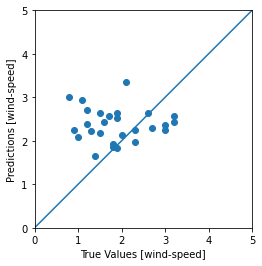

In [41]:
predictions = model1.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## One hidden layer analysis

In [42]:
model2.fit(X_train,y_train,epochs=10000)


Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 5.8401 - mae: 2.2752 - mse: 5.8401 - mape: 99.3136
Epoch 2/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7646 - mae: 2.2640 - mse: 5.7646 - mape: 99.1419
Epoch 3/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7603 - mae: 2.2593 - mse: 5.7603 - mape: 98.5688
Epoch 4/10000
2/2 [==============================] - 0s 16ms/step - loss: 5.7398 - mae: 2.2581 - mse: 5.7398 - mape: 98.8120
Epoch 5/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6550 - mae: 2.2372 - mse: 5.6550 - mape: 97.7030
Epoch 6/10000
2/2 [==============================] - 0s 16ms/step - loss: 5.6217 - mae: 2.2279 - mse: 5.6217 - mape: 97.0305
Epoch 7/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5588 - mae: 2.2161 - mse: 5.5588 - mape: 96.7450
Epoch 8/10000
2/2 [==============================] - 0s 16ms/step - loss: 5.6169 - mae: 2.2280 - mse: 5.6169 - mape: 97.0567
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 4.2316 - mae: 1.8870 - mse: 4.2316 - mape: 80.6233
Epoch 66/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1722 - mae: 1.8263 - mse: 4.1722 - mape: 76.3141
Epoch 67/10000
2/2 [==============================] - 0s 0s/step - loss: 4.7027 - mae: 1.9825 - mse: 4.7027 - mape: 83.5285
Epoch 68/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3192 - mae: 1.8642 - mse: 4.3192 - mape: 79.3097
Epoch 69/10000
2/2 [==============================] - 0s 0s/step - loss: 4.2041 - mae: 1.8494 - mse: 4.2041 - mape: 78.6389
Epoch 70/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8047 - mae: 1.7472 - mse: 3.8047 - mape: 73.6972
Epoch 71/10000
2/2 [==============================] - 0s 0s/step - loss: 4.1567 - mae: 1.8607 - mse: 4.1567 - mape: 79.3339
Epoch 72/10000
2/2 [==============================] - 0s 0s/step - loss: 3.8672 - mae: 1.7699 - mse: 3.8672 - mape: 74.5190
Epoch 73/10000
2/2 

2/2 [==============================] - 0s 0s/step - loss: 2.7565 - mae: 1.3777 - mse: 2.7565 - mape: 57.8929
Epoch 130/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0287 - mae: 1.5343 - mse: 3.0287 - mape: 65.1732
Epoch 131/10000
2/2 [==============================] - 0s 0s/step - loss: 3.4218 - mae: 1.5659 - mse: 3.4218 - mape: 63.9383
Epoch 132/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9194 - mae: 1.4829 - mse: 2.9194 - mape: 62.2309
Epoch 133/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7951 - mae: 1.3825 - mse: 2.7951 - mape: 56.7038
Epoch 134/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0579 - mae: 1.4378 - mse: 3.0579 - mape: 58.3049
Epoch 135/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2551 - mae: 1.2523 - mse: 2.2551 - mape: 56.0431
Epoch 136/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4903 - mae: 1.3323 - mse: 2.4903 - mape: 60.1955
Epoch 137/

2/2 [==============================] - 0s 8ms/step - loss: 2.4611 - mae: 1.3426 - mse: 2.4611 - mape: 61.0515
Epoch 193/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8183 - mae: 1.4533 - mse: 2.8183 - mape: 60.0963
Epoch 194/10000
2/2 [==============================] - ETA: 0s - loss: 2.6861 - mae: 1.3801 - mse: 2.6861 - mape: 58.457 - 0s 0s/step - loss: 2.4788 - mae: 1.3144 - mse: 2.4788 - mape: 57.1964
Epoch 195/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2014 - mae: 1.3172 - mse: 2.2014 - mape: 59.7706
Epoch 196/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3243 - mae: 1.3090 - mse: 2.3243 - mape: 64.5615
Epoch 197/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2918 - mae: 1.2425 - mse: 2.2918 - mape: 54.3203
Epoch 198/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0873 - mae: 1.1613 - mse: 2.0873 - mape: 49.2681
Epoch 199/10000
2/2 [==============================] - 0s 16ms/step

2/2 [==============================] - 0s 8ms/step - loss: 1.9661 - mae: 1.1844 - mse: 1.9661 - mape: 51.6672
Epoch 257/10000
2/2 [==============================] - 0s 0s/step - loss: 1.8987 - mae: 1.1775 - mse: 1.8987 - mape: 51.3008
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6701 - mae: 1.0108 - mse: 1.6701 - mape: 41.8750
Epoch 259/10000
2/2 [==============================] - 0s 0s/step - loss: 1.6441 - mae: 1.0729 - mse: 1.6441 - mape: 49.0897
Epoch 260/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4320 - mae: 0.9338 - mse: 1.4320 - mape: 41.2431
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6034 - mae: 1.0548 - mse: 1.6034 - mape: 45.6376
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8528 - mae: 1.1016 - mse: 1.8528 - mape: 47.9514
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7503 - mae: 1.0466 - mse: 1.7503 - mape: 44.0613
Epoch 264/

2/2 [==============================] - 0s 8ms/step - loss: 1.5182 - mae: 0.9598 - mse: 1.5182 - mape: 39.8541
Epoch 321/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7021 - mae: 1.0374 - mse: 1.7021 - mape: 45.1991
Epoch 322/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.0299 - mae: 0.7915 - mse: 1.0299 - mape: 34.7012
Epoch 323/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5692 - mae: 0.9806 - mse: 1.5692 - mape: 41.7280
Epoch 324/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5680 - mae: 0.9840 - mse: 1.5680 - mape: 44.9378
Epoch 325/10000
2/2 [==============================] - ETA: 0s - loss: 1.2550 - mae: 0.9315 - mse: 1.2550 - mape: 44.901 - 0s 8ms/step - loss: 1.3580 - mae: 0.9437 - mse: 1.3580 - mape: 43.4135
Epoch 326/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6525 - mae: 1.0051 - mse: 1.6525 - mape: 48.4514
Epoch 327/10000
2/2 [==============================] - 0s 8ms/ste

2/2 [==============================] - 0s 8ms/step - loss: 1.2853 - mae: 0.8129 - mse: 1.2853 - mape: 33.3550
Epoch 384/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3879 - mae: 0.8958 - mse: 1.3879 - mape: 40.1113
Epoch 385/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1912 - mae: 0.9368 - mse: 1.1912 - mape: 43.0242
Epoch 386/10000
2/2 [==============================] - 0s 0s/step - loss: 1.6416 - mae: 0.9948 - mse: 1.6416 - mape: 43.7375
Epoch 387/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3561 - mae: 0.9512 - mse: 1.3561 - mape: 41.2241
Epoch 388/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2821 - mae: 0.8637 - mse: 1.2821 - mape: 40.7640
Epoch 389/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1561 - mae: 0.8209 - mse: 1.1561 - mape: 35.4060
Epoch 390/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9771 - mae: 0.7834 - mse: 0.9771 - mape: 34.0027
Epoch 391

2/2 [==============================] - 0s 8ms/step - loss: 1.2844 - mae: 0.8626 - mse: 1.2844 - mape: 39.2194
Epoch 449/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3408 - mae: 0.8841 - mse: 1.3408 - mape: 42.5247
Epoch 450/10000
2/2 [==============================] - 0s 0s/step - loss: 1.2990 - mae: 0.9064 - mse: 1.2990 - mape: 42.6848
Epoch 451/10000
2/2 [==============================] - 0s 0s/step - loss: 1.4313 - mae: 0.9257 - mse: 1.4313 - mape: 40.4528
Epoch 452/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1579 - mae: 0.8467 - mse: 1.1579 - mape: 36.8969
Epoch 453/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1468 - mae: 0.8680 - mse: 1.1468 - mape: 42.2423
Epoch 454/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.1229 - mae: 0.8013 - mse: 1.1229 - mape: 40.7925
Epoch 455/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7427 - mae: 0.6952 - mse: 0.7427 - mape: 31.0683
Epoch 456

2/2 [==============================] - 0s 8ms/step - loss: 0.9611 - mae: 0.8056 - mse: 0.9611 - mape: 39.0803
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8740 - mae: 0.7837 - mse: 0.8740 - mape: 37.9925
Epoch 514/10000
2/2 [==============================] - ETA: 0s - loss: 1.5492 - mae: 0.9460 - mse: 1.5492 - mape: 42.050 - 0s 8ms/step - loss: 1.3671 - mae: 0.8865 - mse: 1.3671 - mape: 41.6587
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9342 - mae: 0.7750 - mse: 0.9342 - mape: 33.8764
Epoch 516/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4561 - mae: 0.9988 - mse: 1.4561 - mape: 46.2085
Epoch 517/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0518 - mae: 0.8171 - mse: 1.0518 - mape: 40.6266
Epoch 518/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1441 - mae: 0.7991 - mse: 1.1441 - mape: 37.5021
Epoch 519/10000
2/2 [==============================] - 0s 8ms/step

2/2 [==============================] - 0s 8ms/step - loss: 0.9400 - mae: 0.7615 - mse: 0.9400 - mape: 34.4111
Epoch 577/10000
2/2 [==============================] - 0s 0s/step - loss: 0.8562 - mae: 0.7750 - mse: 0.8562 - mape: 38.6355
Epoch 578/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3943 - mae: 0.9427 - mse: 1.3943 - mape: 48.3851
Epoch 579/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0269 - mae: 0.7917 - mse: 1.0269 - mape: 36.3924
Epoch 580/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1181 - mae: 0.8208 - mse: 1.1181 - mape: 35.8228
Epoch 581/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3572 - mae: 0.9465 - mse: 1.3572 - mape: 43.9015
Epoch 582/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0717 - mae: 0.7810 - mse: 1.0717 - mape: 35.1125
Epoch 583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8548 - mae: 0.7835 - mse: 0.8548 - mape: 36.2402
Epoch 584

2/2 [==============================] - 0s 8ms/step - loss: 0.9401 - mae: 0.7918 - mse: 0.9401 - mape: 36.1141
Epoch 641/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7367 - mae: 0.7024 - mse: 0.7367 - mape: 34.8249
Epoch 642/10000
2/2 [==============================] - 0s 0s/step - loss: 1.0566 - mae: 0.8100 - mse: 1.0566 - mape: 37.6930
Epoch 643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9889 - mae: 0.8042 - mse: 0.9889 - mape: 38.9441
Epoch 644/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0045 - mae: 0.8249 - mse: 1.0045 - mape: 37.2972
Epoch 645/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0116 - mae: 0.8361 - mse: 1.0116 - mape: 41.9496
Epoch 646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7622 - mae: 0.6889 - mse: 0.7622 - mape: 30.9695
Epoch 647/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.1454 - mae: 0.8902 - mse: 1.1454 - mape: 45.3558
Epoch 64

2/2 [==============================] - 0s 8ms/step - loss: 0.7195 - mae: 0.6796 - mse: 0.7195 - mape: 33.9010
Epoch 705/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9268 - mae: 0.7626 - mse: 0.9268 - mape: 36.1744
Epoch 706/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0552 - mae: 0.8255 - mse: 1.0552 - mape: 41.7319
Epoch 707/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9228 - mae: 0.6879 - mse: 0.9228 - mape: 30.8829
Epoch 708/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0607 - mae: 0.8232 - mse: 1.0607 - mape: 39.1380
Epoch 709/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0647 - mae: 0.7971 - mse: 1.0647 - mape: 37.0274
Epoch 710/10000
2/2 [==============================] - 0s 0s/step - loss: 1.0716 - mae: 0.8470 - mse: 1.0716 - mape: 42.1224
Epoch 711/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0775 - mae: 0.8333 - mse: 1.0775 - mape: 39.8040
Epoch 712

2/2 [==============================] - 0s 8ms/step - loss: 0.8627 - mae: 0.7196 - mse: 0.8627 - mape: 36.0285
Epoch 769/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9560 - mae: 0.7631 - mse: 0.9560 - mape: 38.1726
Epoch 770/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8791 - mae: 0.7312 - mse: 0.8791 - mape: 36.5374
Epoch 771/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6244 - mae: 0.6330 - mse: 0.6244 - mape: 30.9456
Epoch 772/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7855 - mae: 0.6885 - mse: 0.7855 - mape: 33.7937
Epoch 773/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6576 - mae: 0.6108 - mse: 0.6576 - mape: 30.5180
Epoch 774/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9942 - mae: 0.8316 - mse: 0.9942 - mape: 43.3299
Epoch 775/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8942 - mae: 0.7346 - mse: 0.8942 - mape: 31.8237
Epoch 776

2/2 [==============================] - 0s 8ms/step - loss: 0.7949 - mae: 0.6940 - mse: 0.7949 - mape: 33.8648
Epoch 833/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0474 - mae: 0.8025 - mse: 1.0474 - mape: 39.8183
Epoch 834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8786 - mae: 0.7115 - mse: 0.8786 - mape: 36.3363
Epoch 835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8421 - mae: 0.6912 - mse: 0.8421 - mape: 32.7073
Epoch 836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6429 - mae: 0.6342 - mse: 0.6429 - mape: 32.0047
Epoch 837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8034 - mae: 0.6882 - mse: 0.8034 - mape: 32.2993
Epoch 838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7859 - mae: 0.7408 - mse: 0.7859 - mape: 36.3510
Epoch 839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8702 - mae: 0.8185 - mse: 0.8702 - mape: 42.2640
Epoch 84

2/2 [==============================] - 0s 8ms/step - loss: 0.8405 - mae: 0.6730 - mse: 0.8405 - mape: 34.6233
Epoch 897/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6842 - mae: 0.6438 - mse: 0.6842 - mape: 34.0347
Epoch 898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7853 - mae: 0.7191 - mse: 0.7853 - mape: 34.9709
Epoch 899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6408 - mae: 0.6395 - mse: 0.6408 - mape: 32.3051
Epoch 900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9247 - mae: 0.7426 - mse: 0.9247 - mape: 35.9519
Epoch 901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6456 - mae: 0.6391 - mse: 0.6456 - mape: 31.2826
Epoch 902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7037 - mae: 0.6764 - mse: 0.7037 - mape: 33.4388
Epoch 903/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7819 - mae: 0.7217 - mse: 0.7819 - mape: 37.6382
Epoch 904

2/2 [==============================] - 0s 8ms/step - loss: 0.8190 - mae: 0.6862 - mse: 0.8190 - mape: 32.8425
Epoch 962/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8846 - mae: 0.7565 - mse: 0.8846 - mape: 38.4054
Epoch 963/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6343 - mae: 0.6143 - mse: 0.6343 - mape: 32.1111
Epoch 964/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7752 - mae: 0.7131 - mse: 0.7752 - mape: 36.7144
Epoch 965/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6675 - mae: 0.6797 - mse: 0.6675 - mape: 35.4807
Epoch 966/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8560 - mae: 0.7788 - mse: 0.8560 - mape: 39.4212
Epoch 967/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7694 - mae: 0.7050 - mse: 0.7694 - mape: 34.0842
Epoch 968/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9207 - mae: 0.7780 - mse: 0.9207 - mape: 38.1785
Epoch 96

2/2 [==============================] - 0s 0s/step - loss: 0.7889 - mae: 0.6922 - mse: 0.7889 - mape: 34.8593
Epoch 1026/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8494 - mae: 0.7425 - mse: 0.8494 - mape: 38.5732
Epoch 1027/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5173 - mae: 0.5746 - mse: 0.5173 - mape: 28.0071
Epoch 1028/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8220 - mae: 0.7221 - mse: 0.8220 - mape: 37.5148
Epoch 1029/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8750 - mae: 0.7038 - mse: 0.8750 - mape: 34.2844
Epoch 1030/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6878 - mae: 0.6609 - mse: 0.6878 - mape: 33.6743
Epoch 1031/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8903 - mae: 0.7287 - mse: 0.8903 - mape: 37.3320
Epoch 1032/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5489 - mae: 0.6092 - mse: 0.5489 - mape: 30.8159
Epo

2/2 [==============================] - 0s 16ms/step - loss: 0.6311 - mae: 0.6160 - mse: 0.6311 - mape: 31.6721
Epoch 1090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7970 - mae: 0.7034 - mse: 0.7970 - mape: 34.6211
Epoch 1091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7056 - mae: 0.6549 - mse: 0.7056 - mape: 32.8125
Epoch 1092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8295 - mae: 0.7151 - mse: 0.8295 - mape: 37.6007
Epoch 1093/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5913 - mae: 0.6350 - mse: 0.5913 - mape: 31.7765
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8740 - mae: 0.7375 - mse: 0.8740 - mape: 38.9786
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7446 - mae: 0.6746 - mse: 0.7446 - mape: 32.7101
Epoch 1096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6963 - mae: 0.6665 - mse: 0.6963 - mape: 34.0503
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6022 - mae: 0.6140 - mse: 0.6022 - mape: 31.4097
Epoch 1153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6627 - mae: 0.6066 - mse: 0.6627 - mape: 31.7361
Epoch 1154/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5741 - mae: 0.6047 - mse: 0.5741 - mape: 30.3946
Epoch 1155/10000
2/2 [==============================] - ETA: 0s - loss: 0.5845 - mae: 0.6604 - mse: 0.5845 - mape: 32.749 - 0s 8ms/step - loss: 0.7577 - mae: 0.7186 - mse: 0.7577 - mape: 37.1381
Epoch 1156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7130 - mae: 0.6399 - mse: 0.7130 - mape: 33.7281
Epoch 1157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6964 - mae: 0.6818 - mse: 0.6964 - mape: 35.4147
Epoch 1158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7558 - mae: 0.6986 - mse: 0.7558 - mape: 35.0719
Epoch 1159/10000
2/2 [==============================] - 0s 8

2/2 [==============================] - 0s 8ms/step - loss: 0.6537 - mae: 0.6173 - mse: 0.6537 - mape: 30.0827
Epoch 1216/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5751 - mae: 0.6123 - mse: 0.5751 - mape: 30.5372
Epoch 1217/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5677 - mae: 0.5858 - mse: 0.5677 - mape: 31.0062
Epoch 1218/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6633 - mae: 0.6502 - mse: 0.6633 - mape: 34.7449
Epoch 1219/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6291 - mae: 0.6325 - mse: 0.6291 - mape: 32.6366
Epoch 1220/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7011 - mae: 0.6742 - mse: 0.7011 - mape: 35.0833
Epoch 1221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7552 - mae: 0.7084 - mse: 0.7552 - mape: 37.2114
Epoch 1222/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6001 - mae: 0.6497 - mse: 0.6001 - mape: 34.1198
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6313 - mae: 0.6430 - mse: 0.6313 - mape: 32.2413
Epoch 1280/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5989 - mae: 0.6310 - mse: 0.5989 - mape: 32.2334
Epoch 1281/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7661 - mae: 0.7090 - mse: 0.7661 - mape: 38.1375
Epoch 1282/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8003 - mae: 0.7202 - mse: 0.8003 - mape: 37.7830
Epoch 1283/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7167 - mae: 0.7303 - mse: 0.7167 - mape: 37.5792
Epoch 1284/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6191 - mae: 0.6606 - mse: 0.6191 - mape: 34.3769
Epoch 1285/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6920 - mae: 0.6616 - mse: 0.6920 - mape: 33.0398
Epoch 1286/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7055 - mae: 0.6899 - mse: 0.7055 - mape: 36.4433
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6686 - mae: 0.6491 - mse: 0.6686 - mape: 33.2862
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7410 - mae: 0.6735 - mse: 0.7410 - mape: 34.5538
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5774 - mae: 0.5847 - mse: 0.5774 - mape: 30.6647
Epoch 1346/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7087 - mae: 0.6526 - mse: 0.7087 - mape: 32.2330
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7090 - mae: 0.6556 - mse: 0.7090 - mape: 34.5799
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6052 - mae: 0.6058 - mse: 0.6052 - mape: 30.8029
Epoch 1349/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6944 - mae: 0.6568 - mse: 0.6944 - mape: 33.0600
Epoch 1350/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6234 - mae: 0.6376 - mse: 0.6234 - mape: 33.1760
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6157 - mae: 0.6344 - mse: 0.6157 - mape: 32.9041
Epoch 1408/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6823 - mae: 0.6479 - mse: 0.6823 - mape: 34.0592
Epoch 1409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5644 - mae: 0.6038 - mse: 0.5644 - mape: 32.4727
Epoch 1410/10000
2/2 [==============================] - ETA: 0s - loss: 0.5886 - mae: 0.6436 - mse: 0.5886 - mape: 32.542 - 0s 0s/step - loss: 0.5278 - mae: 0.6076 - mse: 0.5278 - mape: 31.7051
Epoch 1411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6841 - mae: 0.6556 - mse: 0.6841 - mape: 33.9038
Epoch 1412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6970 - mae: 0.6306 - mse: 0.6970 - mape: 33.6907
Epoch 1413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7883 - mae: 0.7020 - mse: 0.7883 - mape: 36.1372
Epoch 1414/10000
2/2 [==============================] - 0s 8ms

2/2 [==============================] - 0s 8ms/step - loss: 0.6988 - mae: 0.6848 - mse: 0.6988 - mape: 35.3532
Epoch 1472/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5198 - mae: 0.5871 - mse: 0.5198 - mape: 30.5310
Epoch 1473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6434 - mae: 0.6320 - mse: 0.6434 - mape: 32.4987
Epoch 1474/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7146 - mae: 0.6948 - mse: 0.7146 - mape: 36.9748
Epoch 1475/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7138 - mae: 0.6844 - mse: 0.7138 - mape: 35.9518
Epoch 1476/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6664 - mae: 0.6475 - mse: 0.6664 - mape: 33.7081
Epoch 1477/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6020 - mae: 0.6325 - mse: 0.6020 - mape: 34.2824
Epoch 1478/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5886 - mae: 0.6139 - mse: 0.5886 - mape: 32.2246
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5421 - mae: 0.6141 - mse: 0.5421 - mape: 32.2002
Epoch 1536/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6229 - mae: 0.5955 - mse: 0.6229 - mape: 31.7280
Epoch 1537/10000
2/2 [==============================] - ETA: 0s - loss: 0.6543 - mae: 0.6473 - mse: 0.6543 - mape: 34.629 - 0s 8ms/step - loss: 0.5960 - mae: 0.6056 - mse: 0.5960 - mape: 32.0437
Epoch 1538/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6257 - mae: 0.6288 - mse: 0.6257 - mape: 33.2497
Epoch 1539/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5664 - mae: 0.6149 - mse: 0.5664 - mape: 32.7747
Epoch 1540/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7196 - mae: 0.6561 - mse: 0.7196 - mape: 33.6569
Epoch 1541/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5650 - mae: 0.5677 - mse: 0.5650 - mape: 30.1483
Epoch 1542/10000
2/2 [==============================] - 0s 0

2/2 [==============================] - 0s 8ms/step - loss: 0.6671 - mae: 0.6103 - mse: 0.6671 - mape: 32.1750
Epoch 1600/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6258 - mae: 0.6374 - mse: 0.6258 - mape: 33.8100
Epoch 1601/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7051 - mae: 0.6777 - mse: 0.7051 - mape: 36.1106
Epoch 1602/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7266 - mae: 0.6825 - mse: 0.7266 - mape: 35.7755
Epoch 1603/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6694 - mae: 0.6558 - mse: 0.6694 - mape: 33.3378
Epoch 1604/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5974 - mae: 0.6165 - mse: 0.5974 - mape: 33.0586
Epoch 1605/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6724 - mae: 0.6362 - mse: 0.6724 - mape: 33.0467
Epoch 1606/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6803 - mae: 0.6664 - mse: 0.6803 - mape: 34.6839


2/2 [==============================] - 0s 8ms/step - loss: 0.6066 - mae: 0.6090 - mse: 0.6066 - mape: 32.5161
Epoch 1663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6919 - mae: 0.6745 - mse: 0.6919 - mape: 34.8414
Epoch 1664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - mae: 0.6359 - mse: 0.6702 - mape: 33.0910
Epoch 1665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6303 - mae: 0.6333 - mse: 0.6303 - mape: 32.8655
Epoch 1666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7080 - mae: 0.6679 - mse: 0.7080 - mape: 35.5440
Epoch 1667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6963 - mae: 0.6650 - mse: 0.6963 - mape: 34.7494
Epoch 1668/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6817 - mae: 0.6421 - mse: 0.6817 - mape: 33.1342
Epoch 1669/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5714 - mae: 0.5918 - mse: 0.5714 - mape: 32.2540
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6289 - mae: 0.6423 - mse: 0.6289 - mape: 33.7610
Epoch 1727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5496 - mae: 0.6226 - mse: 0.5496 - mape: 32.9819
Epoch 1728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7000 - mae: 0.6649 - mse: 0.7000 - mape: 34.3709
Epoch 1729/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6543 - mae: 0.6335 - mse: 0.6543 - mape: 33.1893
Epoch 1730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6112 - mae: 0.6302 - mse: 0.6112 - mape: 32.9067
Epoch 1731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5794 - mae: 0.6379 - mse: 0.5794 - mape: 33.4233
Epoch 1732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5966 - mae: 0.6328 - mse: 0.5966 - mape: 33.2939
Epoch 1733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5661 - mae: 0.6285 - mse: 0.5661 - mape: 33.2455
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5510 - mae: 0.6162 - mse: 0.5510 - mape: 32.3922
Epoch 1791/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5217 - mae: 0.6004 - mse: 0.5217 - mape: 33.0047
Epoch 1792/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6479 - mae: 0.6411 - mse: 0.6479 - mape: 33.1986
Epoch 1793/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.6605 - mae: 0.6373 - mse: 0.6605 - mape: 32.7339
Epoch 1794/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6714 - mae: 0.6409 - mse: 0.6714 - mape: 34.3381
Epoch 1795/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6792 - mae: 0.6465 - mse: 0.6792 - mape: 34.3092
Epoch 1796/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6927 - mae: 0.6729 - mse: 0.6927 - mape: 34.8639
Epoch 1797/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6348 - mae: 0.6333 - mse: 0.6348 - mape: 33.3822


2/2 [==============================] - 0s 8ms/step - loss: 0.5031 - mae: 0.5794 - mse: 0.5031 - mape: 30.6616
Epoch 1854/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6189 - mae: 0.6181 - mse: 0.6189 - mape: 33.0498
Epoch 1855/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5651 - mae: 0.6046 - mse: 0.5651 - mape: 31.9584
Epoch 1856/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5095 - mae: 0.5892 - mse: 0.5095 - mape: 32.5166
Epoch 1857/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5364 - mae: 0.5848 - mse: 0.5364 - mape: 31.3429
Epoch 1858/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5615 - mae: 0.6046 - mse: 0.5615 - mape: 33.0108
Epoch 1859/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5131 - mae: 0.5836 - mse: 0.5131 - mape: 31.3777
Epoch 1860/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5266 - mae: 0.5602 - mse: 0.5266 - mape: 31.0929
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5940 - mae: 0.6147 - mse: 0.5940 - mape: 33.4411
Epoch 1918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6395 - mae: 0.6227 - mse: 0.6395 - mape: 33.5275
Epoch 1919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6282 - mae: 0.6343 - mse: 0.6282 - mape: 33.9885
Epoch 1920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5996 - mae: 0.6010 - mse: 0.5996 - mape: 31.7875
Epoch 1921/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6174 - mae: 0.6343 - mse: 0.6174 - mape: 33.4201
Epoch 1922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5279 - mae: 0.5782 - mse: 0.5279 - mape: 31.0352
Epoch 1923/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5800 - mae: 0.5886 - mse: 0.5800 - mape: 31.8733
Epoch 1924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5059 - mae: 0.5753 - mse: 0.5059 - mape: 30.9362
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6362 - mae: 0.6238 - mse: 0.6362 - mape: 33.3247
Epoch 1981/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6229 - mae: 0.6155 - mse: 0.6229 - mape: 32.8931
Epoch 1982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6192 - mae: 0.6108 - mse: 0.6192 - mape: 32.4011
Epoch 1983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5786 - mae: 0.5838 - mse: 0.5786 - mape: 30.5469
Epoch 1984/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6012 - mae: 0.6176 - mse: 0.6012 - mape: 33.0424
Epoch 1985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6262 - mae: 0.6352 - mse: 0.6262 - mape: 33.1726
Epoch 1986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5661 - mae: 0.5985 - mse: 0.5661 - mape: 32.4097
Epoch 1987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6576 - mae: 0.6460 - mse: 0.6576 - mape: 33.4182
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5665 - mae: 0.5825 - mse: 0.5665 - mape: 30.8830
Epoch 2044/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6652 - mae: 0.6426 - mse: 0.6652 - mape: 33.9411
Epoch 2045/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5991 - mae: 0.6266 - mse: 0.5991 - mape: 34.5358
Epoch 2046/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5252 - mae: 0.5902 - mse: 0.5252 - mape: 31.9553
Epoch 2047/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6331 - mae: 0.6153 - mse: 0.6331 - mape: 31.8486
Epoch 2048/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5865 - mae: 0.6048 - mse: 0.5865 - mape: 31.8495
Epoch 2049/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5891 - mae: 0.6046 - mse: 0.5891 - mape: 31.7503
Epoch 2050/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6449 - mae: 0.6444 - mse: 0.6449 - mape: 33.5577
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6174 - mae: 0.6088 - mse: 0.6174 - mape: 32.0875
Epoch 2108/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6477 - mae: 0.6286 - mse: 0.6477 - mape: 32.9195
Epoch 2109/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4932 - mae: 0.5717 - mse: 0.4932 - mape: 31.3553
Epoch 2110/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4754 - mae: 0.5493 - mse: 0.4754 - mape: 30.2083
Epoch 2111/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5289 - mae: 0.5887 - mse: 0.5289 - mape: 32.4859
Epoch 2112/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5897 - mae: 0.5846 - mse: 0.5897 - mape: 31.4350
Epoch 2113/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6313 - mae: 0.6260 - mse: 0.6313 - mape: 32.8468
Epoch 2114/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6737 - mae: 0.6566 - mse: 0.6737 - mape: 34.2269
Epoch

2/2 [==============================] - 0s 0s/step - loss: 0.6146 - mae: 0.6295 - mse: 0.6146 - mape: 33.4060
Epoch 2172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6038 - mae: 0.6212 - mse: 0.6038 - mape: 33.1867
Epoch 2173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5563 - mae: 0.6005 - mse: 0.5563 - mape: 32.6578
Epoch 2174/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4994 - mae: 0.5575 - mse: 0.4994 - mape: 31.3295
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5976 - mae: 0.6367 - mse: 0.5976 - mape: 33.3923
Epoch 2176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5705 - mae: 0.6185 - mse: 0.5705 - mape: 33.1384
Epoch 2177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5137 - mae: 0.5787 - mse: 0.5137 - mape: 32.0617
Epoch 2178/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5994 - mae: 0.5979 - mse: 0.5994 - mape: 31.9180
Ep

2/2 [==============================] - 0s 0s/step - loss: 0.6297 - mae: 0.6467 - mse: 0.6297 - mape: 33.9482
Epoch 2236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5151 - mae: 0.5820 - mse: 0.5151 - mape: 32.2035
Epoch 2237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5972 - mae: 0.6416 - mse: 0.5972 - mape: 34.4657
Epoch 2238/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4676 - mae: 0.5583 - mse: 0.4676 - mape: 30.8900
Epoch 2239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6309 - mae: 0.6275 - mse: 0.6309 - mape: 32.2836
Epoch 2240/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6300 - mae: 0.6229 - mse: 0.6300 - mape: 32.4751
Epoch 2241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6321 - mae: 0.6336 - mse: 0.6321 - mape: 32.8288
Epoch 2242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6397 - mae: 0.6205 - mse: 0.6397 - mape: 32.2282
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5836 - mae: 0.6024 - mse: 0.5836 - mape: 31.9725
Epoch 2300/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5171 - mae: 0.5910 - mse: 0.5171 - mape: 32.2058
Epoch 2301/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6485 - mae: 0.6459 - mse: 0.6485 - mape: 33.8055
Epoch 2302/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6339 - mae: 0.6244 - mse: 0.6339 - mape: 32.7480
Epoch 2303/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5952 - mae: 0.5941 - mse: 0.5952 - mape: 32.0522
Epoch 2304/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5675 - mae: 0.5991 - mse: 0.5675 - mape: 32.1014
Epoch 2305/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5103 - mae: 0.5890 - mse: 0.5103 - mape: 32.8177
Epoch 2306/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5905 - mae: 0.6098 - mse: 0.5905 - mape: 32.6112
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5289 - mae: 0.5882 - mse: 0.5289 - mape: 32.1463
Epoch 2363/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5952 - mae: 0.6003 - mse: 0.5952 - mape: 32.5635
Epoch 2364/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5405 - mae: 0.5969 - mse: 0.5405 - mape: 32.9333
Epoch 2365/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6259 - mae: 0.6274 - mse: 0.6259 - mape: 32.6072
Epoch 2366/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6523 - mae: 0.6173 - mse: 0.6523 - mape: 33.0986
Epoch 2367/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6476 - mae: 0.6320 - mse: 0.6476 - mape: 33.6237
Epoch 2368/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5156 - mae: 0.5929 - mse: 0.5156 - mape: 32.0856
Epoch 2369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6415 - mae: 0.6323 - mse: 0.6415 - mape: 33.0530
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.5251 - mae: 0.5770 - mse: 0.5251 - mape: 30.9032
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6463 - mae: 0.6431 - mse: 0.6463 - mape: 33.3640
Epoch 2428/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5663 - mae: 0.5929 - mse: 0.5663 - mape: 31.1586
Epoch 2429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4434 - mae: 0.5198 - mse: 0.4434 - mape: 29.7081
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5903 - mae: 0.6116 - mse: 0.5903 - mape: 32.2600
Epoch 2431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5921 - mae: 0.5944 - mse: 0.5921 - mape: 31.1599
Epoch 2432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5578 - mae: 0.5958 - mse: 0.5578 - mape: 31.8824
Epoch 2433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5229 - mae: 0.5993 - mse: 0.5229 - mape: 32.1837
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5654 - mae: 0.6095 - mse: 0.5654 - mape: 33.6198
Epoch 2491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4987 - mae: 0.5704 - mse: 0.4987 - mape: 30.9574
Epoch 2492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5650 - mae: 0.5707 - mse: 0.5650 - mape: 30.8948
Epoch 2493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6936 - mae: 0.6545 - mse: 0.6936 - mape: 34.0527
Epoch 2494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6621 - mae: 0.6396 - mse: 0.6621 - mape: 33.5670
Epoch 2495/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4563 - mae: 0.5443 - mse: 0.4563 - mape: 30.7015
Epoch 2496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5329 - mae: 0.6031 - mse: 0.5329 - mape: 32.3384
Epoch 2497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4769 - mae: 0.5697 - mse: 0.4769 - mape: 31.1695
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5531 - mae: 0.5940 - mse: 0.5531 - mape: 31.8321
Epoch 2555/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6182 - mae: 0.6099 - mse: 0.6182 - mape: 32.0161
Epoch 2556/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5350 - mae: 0.5695 - mse: 0.5350 - mape: 30.3185
Epoch 2557/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5499 - mae: 0.6143 - mse: 0.5499 - mape: 32.5178
Epoch 2558/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4453 - mae: 0.5349 - mse: 0.4453 - mape: 30.5982
Epoch 2559/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6516 - mae: 0.6515 - mse: 0.6516 - mape: 34.5408
Epoch 2560/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - mae: 0.6503 - mse: 0.6842 - mape: 34.1821
Epoch 2561/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6387 - mae: 0.6269 - mse: 0.6387 - mape: 32.8897
Epoc

Epoch 2618/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5209 - mae: 0.5834 - mse: 0.5209 - mape: 31.3526
Epoch 2619/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5249 - mae: 0.5637 - mse: 0.5249 - mape: 30.3809
Epoch 2620/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6900 - mae: 0.6533 - mse: 0.6900 - mape: 33.5239
Epoch 2621/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5019 - mae: 0.5811 - mse: 0.5019 - mape: 31.2301
Epoch 2622/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6437 - mae: 0.6356 - mse: 0.6437 - mape: 33.2918
Epoch 2623/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5953 - mae: 0.5898 - mse: 0.5953 - mape: 31.8640
Epoch 2624/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5013 - mae: 0.5695 - mse: 0.5013 - mape: 30.9775
Epoch 2625/10000
2/2 [==============================] - ETA: 0s - loss: 0.6290 - mae: 0.6138 - mse: 0.6290 - map

2/2 [==============================] - 0s 8ms/step - loss: 0.4309 - mae: 0.5137 - mse: 0.4309 - mape: 29.3348
Epoch 2681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6407 - mae: 0.6298 - mse: 0.6407 - mape: 32.7557
Epoch 2682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6419 - mae: 0.6301 - mse: 0.6419 - mape: 32.8452
Epoch 2683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6659 - mae: 0.6319 - mse: 0.6659 - mape: 33.1856
Epoch 2684/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5365 - mae: 0.6003 - mse: 0.5365 - mape: 32.1245
Epoch 2685/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5698 - mae: 0.5720 - mse: 0.5698 - mape: 30.6497
Epoch 2686/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5964 - mae: 0.5931 - mse: 0.5964 - mape: 31.2804
Epoch 2687/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5605 - mae: 0.5860 - mse: 0.5605 - mape: 31.6535
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5916 - mae: 0.5910 - mse: 0.5916 - mape: 31.5716
Epoch 2744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5725 - mae: 0.5817 - mse: 0.5725 - mape: 31.6642
Epoch 2745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4666 - mae: 0.5640 - mse: 0.4666 - mape: 30.7801
Epoch 2746/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6389 - mae: 0.6350 - mse: 0.6389 - mape: 33.2630
Epoch 2747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5295 - mae: 0.5846 - mse: 0.5295 - mape: 31.4439
Epoch 2748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5358 - mae: 0.5920 - mse: 0.5358 - mape: 31.9216
Epoch 2749/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5781 - mae: 0.6205 - mse: 0.5781 - mape: 33.3622
Epoch 2750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5799 - mae: 0.6109 - mse: 0.5799 - mape: 32.4557
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.6192 - mae: 0.6201 - mse: 0.6192 - mape: 32.6836
Epoch 2807/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5920 - mae: 0.5859 - mse: 0.5920 - mape: 31.7782
Epoch 2808/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5950 - mae: 0.5960 - mse: 0.5950 - mape: 31.5777
Epoch 2809/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5791 - mae: 0.6082 - mse: 0.5791 - mape: 32.9854
Epoch 2810/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5412 - mae: 0.5874 - mse: 0.5412 - mape: 32.1757
Epoch 2811/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4606 - mae: 0.5385 - mse: 0.4606 - mape: 29.8552
Epoch 2812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5655 - mae: 0.6113 - mse: 0.5655 - mape: 32.0149
Epoch 2813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5371 - mae: 0.5857 - mse: 0.5371 - mape: 31.5172
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5427 - mae: 0.6098 - mse: 0.5427 - mape: 33.2027
Epoch 2871/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5054 - mae: 0.5719 - mse: 0.5054 - mape: 31.0959
Epoch 2872/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5420 - mae: 0.5948 - mse: 0.5420 - mape: 31.7699
Epoch 2873/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6294 - mae: 0.6191 - mse: 0.6294 - mape: 32.8094
Epoch 2874/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5179 - mae: 0.5818 - mse: 0.5179 - mape: 31.6617
Epoch 2875/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6192 - mae: 0.6233 - mse: 0.6192 - mape: 32.5068
Epoch 2876/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6288 - mae: 0.6273 - mse: 0.6288 - mape: 32.8508
Epoch 2877/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5232 - mae: 0.5617 - mse: 0.5232 - mape: 31.7047
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5345 - mae: 0.5828 - mse: 0.5345 - mape: 31.7197
Epoch 2935/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5443 - mae: 0.5946 - mse: 0.5443 - mape: 31.9471
Epoch 2936/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6067 - mae: 0.6064 - mse: 0.6067 - mape: 32.1376
Epoch 2937/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5281 - mae: 0.5879 - mse: 0.5281 - mape: 31.9120
Epoch 2938/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5647 - mae: 0.5944 - mse: 0.5647 - mape: 31.8804
Epoch 2939/10000
2/2 [==============================] - ETA: 0s - loss: 0.6553 - mae: 0.6581 - mse: 0.6553 - mape: 37.801 - 0s 0s/step - loss: 0.7100 - mae: 0.6476 - mse: 0.7100 - mape: 34.5901
Epoch 2940/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5015 - mae: 0.5749 - mse: 0.5015 - mape: 31.5254
Epoch 2941/10000
2/2 [==============================] - 0s 8ms

2/2 [==============================] - 0s 0s/step - loss: 0.5701 - mae: 0.5656 - mse: 0.5701 - mape: 30.9076
Epoch 2998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5335 - mae: 0.5898 - mse: 0.5335 - mape: 32.2368
Epoch 2999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6532 - mae: 0.6278 - mse: 0.6532 - mape: 33.8636
Epoch 3000/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5717 - mae: 0.5996 - mse: 0.5717 - mape: 32.2325
Epoch 3001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6533 - mae: 0.6189 - mse: 0.6533 - mape: 33.2566
Epoch 3002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5425 - mae: 0.6090 - mse: 0.5425 - mape: 32.7685
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6156 - mae: 0.6303 - mse: 0.6156 - mape: 33.1632
Epoch 3004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5778 - mae: 0.6023 - mse: 0.5778 - mape: 32.7800
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5937 - mae: 0.6018 - mse: 0.5937 - mape: 31.9684
Epoch 3062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5632 - mae: 0.6153 - mse: 0.5632 - mape: 32.9196
Epoch 3063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5400 - mae: 0.5881 - mse: 0.5400 - mape: 31.9670
Epoch 3064/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5109 - mae: 0.5894 - mse: 0.5109 - mape: 32.0778
Epoch 3065/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6832 - mae: 0.6157 - mse: 0.6832 - mape: 33.2438
Epoch 3066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5931 - mae: 0.5892 - mse: 0.5931 - mape: 31.5275
Epoch 3067/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6118 - mae: 0.6050 - mse: 0.6118 - mape: 31.9639
Epoch 3068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6093 - mae: 0.6096 - mse: 0.6093 - mape: 32.0839
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5323 - mae: 0.5943 - mse: 0.5323 - mape: 31.7629
Epoch 3126/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5717 - mae: 0.6152 - mse: 0.5717 - mape: 32.3235
Epoch 3127/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5218 - mae: 0.6042 - mse: 0.5218 - mape: 32.4291
Epoch 3128/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5104 - mae: 0.5608 - mse: 0.5104 - mape: 30.5136
Epoch 3129/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6087 - mae: 0.6020 - mse: 0.6087 - mape: 32.0734
Epoch 3130/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6260 - mae: 0.6354 - mse: 0.6260 - mape: 33.0908
Epoch 3131/10000
2/2 [==============================] - ETA: 0s - loss: 0.5862 - mae: 0.5775 - mse: 0.5862 - mape: 26.153 - 0s 0s/step - loss: 0.5957 - mae: 0.5983 - mse: 0.5957 - mape: 31.8149
Epoch 3132/10000
2/2 [==============================] - 0s 8ms

2/2 [==============================] - 0s 8ms/step - loss: 0.6340 - mae: 0.6298 - mse: 0.6340 - mape: 32.5691
Epoch 3188/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5987 - mae: 0.5976 - mse: 0.5987 - mape: 31.5028
Epoch 3189/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6151 - mae: 0.6092 - mse: 0.6151 - mape: 32.0241
Epoch 3190/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5503 - mae: 0.5988 - mse: 0.5503 - mape: 32.1192
Epoch 3191/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5371 - mae: 0.5771 - mse: 0.5371 - mape: 31.1843
Epoch 3192/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6537 - mae: 0.6303 - mse: 0.6537 - mape: 33.0535
Epoch 3193/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6093 - mae: 0.5997 - mse: 0.6093 - mape: 31.7279
Epoch 3194/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6296 - mae: 0.6172 - mse: 0.6296 - mape: 32.4726
E

2/2 [==============================] - 0s 0s/step - loss: 0.5834 - mae: 0.6096 - mse: 0.5834 - mape: 32.1243
Epoch 3251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5179 - mae: 0.5922 - mse: 0.5179 - mape: 32.0521
Epoch 3252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6663 - mae: 0.6484 - mse: 0.6663 - mape: 33.6171
Epoch 3253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5769 - mae: 0.6109 - mse: 0.5769 - mape: 32.2054
Epoch 3254/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6256 - mae: 0.6215 - mse: 0.6256 - mape: 32.6658
Epoch 3255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5487 - mae: 0.6089 - mse: 0.5487 - mape: 32.3830
Epoch 3256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6164 - mae: 0.6172 - mse: 0.6164 - mape: 32.4533
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5121 - mae: 0.5885 - mse: 0.5121 - mape: 32.2888
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.5778 - mae: 0.6157 - mse: 0.5778 - mape: 32.9664
Epoch 3315/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6094 - mae: 0.6062 - mse: 0.6094 - mape: 32.0951
Epoch 3316/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5918 - mae: 0.6037 - mse: 0.5918 - mape: 32.3208
Epoch 3317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5694 - mae: 0.5785 - mse: 0.5694 - mape: 31.2411
Epoch 3318/10000
2/2 [==============================] - ETA: 0s - loss: 0.5253 - mae: 0.5396 - mse: 0.5253 - mape: 27.894 - 0s 8ms/step - loss: 0.5935 - mae: 0.5978 - mse: 0.5935 - mape: 31.9020
Epoch 3319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4765 - mae: 0.5725 - mse: 0.4765 - mape: 31.7325
Epoch 3320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5335 - mae: 0.6075 - mse: 0.5335 - mape: 32.8185
Epoch 3321/10000
2/2 [==============================] - 0s 8m

2/2 [==============================] - 0s 0s/step - loss: 0.6225 - mae: 0.6193 - mse: 0.6225 - mape: 32.9586
Epoch 3378/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6161 - mae: 0.6250 - mse: 0.6161 - mape: 33.1626
Epoch 3379/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6069 - mae: 0.6204 - mse: 0.6069 - mape: 32.7921
Epoch 3380/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6304 - mae: 0.6153 - mse: 0.6304 - mape: 32.4207
Epoch 3381/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5458 - mae: 0.6045 - mse: 0.5458 - mape: 32.5735
Epoch 3382/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4712 - mae: 0.5547 - mse: 0.4712 - mape: 30.8186
Epoch 3383/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5214 - mae: 0.5737 - mse: 0.5214 - mape: 31.3315
Epoch 3384/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6096 - mae: 0.5942 - mse: 0.6096 - mape: 31.6081
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6384 - mae: 0.6291 - mse: 0.6384 - mape: 33.0639
Epoch 3442/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6496 - mae: 0.6385 - mse: 0.6496 - mape: 33.1421
Epoch 3443/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5819 - mae: 0.5737 - mse: 0.5819 - mape: 30.8097
Epoch 3444/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6608 - mae: 0.6444 - mse: 0.6608 - mape: 33.1200
Epoch 3445/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6748 - mae: 0.6524 - mse: 0.6748 - mape: 34.0300
Epoch 3446/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5772 - mae: 0.5914 - mse: 0.5772 - mape: 31.6338
Epoch 3447/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6383 - mae: 0.6253 - mse: 0.6383 - mape: 32.4756
Epoch 3448/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6138 - mae: 0.6029 - mse: 0.6138 - mape: 31.8880
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5073 - mae: 0.5756 - mse: 0.5073 - mape: 31.9741
Epoch 3506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5692 - mae: 0.6052 - mse: 0.5692 - mape: 32.1003
Epoch 3507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6057 - mae: 0.6005 - mse: 0.6057 - mape: 32.1045
Epoch 3508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6465 - mae: 0.6325 - mse: 0.6465 - mape: 32.7557
Epoch 3509/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6026 - mae: 0.6177 - mse: 0.6026 - mape: 32.5808
Epoch 3510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5816 - mae: 0.5983 - mse: 0.5816 - mape: 31.5603
Epoch 3511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5104 - mae: 0.5702 - mse: 0.5104 - mape: 30.8729
Epoch 3512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6260 - mae: 0.6189 - mse: 0.6260 - mape: 32.4888
Ep

2/2 [==============================] - 0s 0s/step - loss: 0.6420 - mae: 0.6370 - mse: 0.6420 - mape: 33.4343
Epoch 3570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5775 - mae: 0.6085 - mse: 0.5775 - mape: 32.5645
Epoch 3571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5627 - mae: 0.6009 - mse: 0.5627 - mape: 32.4751
Epoch 3572/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5030 - mae: 0.5409 - mse: 0.5030 - mape: 30.0063
Epoch 3573/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5560 - mae: 0.5997 - mse: 0.5560 - mape: 32.0668
Epoch 3574/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6097 - mae: 0.5972 - mse: 0.6097 - mape: 31.8246
Epoch 3575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6400 - mae: 0.6173 - mse: 0.6400 - mape: 32.5376
Epoch 3576/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5731 - mae: 0.5800 - mse: 0.5731 - mape: 31.0417
Epoc

2/2 [==============================] - 0s 0s/step - loss: 0.5446 - mae: 0.5790 - mse: 0.5446 - mape: 31.1887
Epoch 3634/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6024 - mae: 0.5922 - mse: 0.6024 - mape: 31.7128
Epoch 3635/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5612 - mae: 0.6175 - mse: 0.5612 - mape: 32.9371
Epoch 3636/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4840 - mae: 0.5548 - mse: 0.4840 - mape: 30.7756
Epoch 3637/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6158 - mae: 0.6211 - mse: 0.6158 - mape: 32.8199
Epoch 3638/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5433 - mae: 0.5558 - mse: 0.5433 - mape: 30.5903
Epoch 3639/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5912 - mae: 0.5938 - mse: 0.5912 - mape: 31.6370
Epoch 3640/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5267 - mae: 0.5762 - mse: 0.5267 - mape: 31.2548
Epo

2/2 [==============================] - 0s 0s/step - loss: 0.5469 - mae: 0.5508 - mse: 0.5469 - mape: 30.4204
Epoch 3698/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4976 - mae: 0.5511 - mse: 0.4976 - mape: 30.4592
Epoch 3699/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5139 - mae: 0.5904 - mse: 0.5139 - mape: 32.1635
Epoch 3700/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6286 - mae: 0.6195 - mse: 0.6286 - mape: 32.6813
Epoch 3701/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4911 - mae: 0.5668 - mse: 0.4911 - mape: 31.4200
Epoch 3702/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6152 - mae: 0.6020 - mse: 0.6152 - mape: 32.2608
Epoch 3703/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6113 - mae: 0.5943 - mse: 0.6113 - mape: 31.6958
Epoch 3704/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6389 - mae: 0.6326 - mse: 0.6389 - mape: 33.0116
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.6419 - mae: 0.6253 - mse: 0.6419 - mape: 33.0128
Epoch 3762/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5657 - mae: 0.6094 - mse: 0.5657 - mape: 33.0062
Epoch 3763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5192 - mae: 0.5715 - mse: 0.5192 - mape: 31.0962
Epoch 3764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5821 - mae: 0.5831 - mse: 0.5821 - mape: 31.1961
Epoch 3765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5169 - mae: 0.5793 - mse: 0.5169 - mape: 31.6307
Epoch 3766/10000
2/2 [==============================] - ETA: 0s - loss: 0.4535 - mae: 0.5575 - mse: 0.4535 - mape: 29.541 - 0s 8ms/step - loss: 0.5365 - mae: 0.5844 - mse: 0.5365 - mape: 31.5714
Epoch 3767/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4984 - mae: 0.5790 - mse: 0.4984 - mape: 31.4885
Epoch 3768/10000
2/2 [==============================] - 0s 8ms

2/2 [==============================] - 0s 8ms/step - loss: 0.5405 - mae: 0.5872 - mse: 0.5405 - mape: 31.5880
Epoch 3826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4483 - mae: 0.5391 - mse: 0.4483 - mape: 30.4225
Epoch 3827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5926 - mae: 0.5979 - mse: 0.5926 - mape: 32.1681
Epoch 3828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6521 - mae: 0.6360 - mse: 0.6521 - mape: 33.1045
Epoch 3829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6221 - mae: 0.6280 - mse: 0.6221 - mape: 33.0771
Epoch 3830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6737 - mae: 0.6383 - mse: 0.6737 - mape: 33.7474
Epoch 3831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6100 - mae: 0.6036 - mse: 0.6100 - mape: 32.4650
Epoch 3832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5327 - mae: 0.5910 - mse: 0.5327 - mape: 31.8538
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6187 - mae: 0.6059 - mse: 0.6187 - mape: 32.9431
Epoch 3890/10000
2/2 [==============================] - ETA: 0s - loss: 0.4377 - mae: 0.5568 - mse: 0.4377 - mape: 30.106 - 0s 8ms/step - loss: 0.5037 - mae: 0.5880 - mse: 0.5037 - mape: 32.4212
Epoch 3891/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5772 - mae: 0.5774 - mse: 0.5772 - mape: 31.2805
Epoch 3892/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5195 - mae: 0.5907 - mse: 0.5195 - mape: 32.6597
Epoch 3893/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6252 - mae: 0.6252 - mse: 0.6252 - mape: 33.0820
Epoch 3894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5984 - mae: 0.6056 - mse: 0.5984 - mape: 32.6722
Epoch 3895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5058 - mae: 0.5753 - mse: 0.5058 - mape: 31.9771
Epoch 3896/10000
2/2 [==============================] - 0s 8m

2/2 [==============================] - 0s 8ms/step - loss: 0.6053 - mae: 0.6112 - mse: 0.6053 - mape: 32.4267
Epoch 3952/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6597 - mae: 0.6149 - mse: 0.6597 - mape: 33.3300
Epoch 3953/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6224 - mae: 0.6171 - mse: 0.6224 - mape: 32.8129
Epoch 3954/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5811 - mae: 0.5809 - mse: 0.5811 - mape: 31.3040
Epoch 3955/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4985 - mae: 0.5708 - mse: 0.4985 - mape: 31.4651
Epoch 3956/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5898 - mae: 0.5974 - mse: 0.5898 - mape: 31.7876
Epoch 3957/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6021 - mae: 0.5799 - mse: 0.6021 - mape: 31.7932
Epoch 3958/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6194 - mae: 0.6205 - mse: 0.6194 - mape: 32.5448
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.5864 - mae: 0.5808 - mse: 0.5864 - mape: 31.5789
Epoch 4016/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6581 - mae: 0.6404 - mse: 0.6581 - mape: 33.4784
Epoch 4017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6854 - mae: 0.6404 - mse: 0.6854 - mape: 33.7197
Epoch 4018/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5966 - mae: 0.6046 - mse: 0.5966 - mape: 32.3161
Epoch 4019/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5832 - mae: 0.5926 - mse: 0.5832 - mape: 31.8085
Epoch 4020/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6358 - mae: 0.6131 - mse: 0.6358 - mape: 32.6248
Epoch 4021/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6203 - mae: 0.6188 - mse: 0.6203 - mape: 32.7520
Epoch 4022/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4908 - mae: 0.5721 - mse: 0.4908 - mape: 31.5542
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.6190 - mae: 0.6218 - mse: 0.6190 - mape: 32.8809
Epoch 4079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5742 - mae: 0.5756 - mse: 0.5742 - mape: 31.2515
Epoch 4080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5584 - mae: 0.5933 - mse: 0.5584 - mape: 32.6056
Epoch 4081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6081 - mae: 0.6051 - mse: 0.6081 - mape: 32.4014
Epoch 4082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6294 - mae: 0.6106 - mse: 0.6294 - mape: 32.6868
Epoch 4083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4677 - mae: 0.5568 - mse: 0.4677 - mape: 31.1300
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4746 - mae: 0.5474 - mse: 0.4746 - mape: 30.7711
Epoch 4085/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6290 - mae: 0.6092 - mse: 0.6290 - mape: 32.4667
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6294 - mae: 0.6247 - mse: 0.6294 - mape: 33.5445
Epoch 4142/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5343 - mae: 0.5924 - mse: 0.5343 - mape: 32.5181
Epoch 4143/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6484 - mae: 0.6393 - mse: 0.6484 - mape: 33.4833
Epoch 4144/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6104 - mae: 0.6148 - mse: 0.6104 - mape: 32.5589
Epoch 4145/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6383 - mae: 0.6376 - mse: 0.6383 - mape: 33.3448
Epoch 4146/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5966 - mae: 0.5939 - mse: 0.5966 - mape: 31.6414
Epoch 4147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6717 - mae: 0.6491 - mse: 0.6717 - mape: 34.0592
Epoch 4148/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6205 - mae: 0.6157 - mse: 0.6205 - mape: 32.2551
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.4985 - mae: 0.5890 - mse: 0.4985 - mape: 32.0765
Epoch 4205/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4932 - mae: 0.5809 - mse: 0.4932 - mape: 31.5043
Epoch 4206/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5585 - mae: 0.6189 - mse: 0.5585 - mape: 32.8444
Epoch 4207/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6056 - mae: 0.6235 - mse: 0.6056 - mape: 33.3517
Epoch 4208/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6413 - mae: 0.6281 - mse: 0.6413 - mape: 33.5611
Epoch 4209/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6744 - mae: 0.6614 - mse: 0.6744 - mape: 33.8189
Epoch 4210/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5972 - mae: 0.5917 - mse: 0.5972 - mape: 31.7720
Epoch 4211/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6039 - mae: 0.5911 - mse: 0.6039 - mape: 31.8369
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6248 - mae: 0.6194 - mse: 0.6248 - mape: 33.1083
Epoch 4269/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6068 - mae: 0.6071 - mse: 0.6068 - mape: 32.4628
Epoch 4270/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5868 - mae: 0.5863 - mse: 0.5868 - mape: 31.4935
Epoch 4271/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5802 - mae: 0.6237 - mse: 0.5802 - mape: 33.2527
Epoch 4272/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4651 - mae: 0.5413 - mse: 0.4651 - mape: 30.3501
Epoch 4273/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4682 - mae: 0.5264 - mse: 0.4682 - mape: 29.8994
Epoch 4274/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5311 - mae: 0.6051 - mse: 0.5311 - mape: 32.5810
Epoch 4275/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4797 - mae: 0.5599 - mse: 0.4797 - mape: 31.4541
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.4823 - mae: 0.5593 - mse: 0.4823 - mape: 30.9639
Epoch 4333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5971 - mae: 0.6015 - mse: 0.5971 - mape: 31.9430
Epoch 4334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5725 - mae: 0.5773 - mse: 0.5725 - mape: 31.0775
Epoch 4335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6030 - mae: 0.6013 - mse: 0.6030 - mape: 31.8496
Epoch 4336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5276 - mae: 0.5770 - mse: 0.5276 - mape: 31.2216
Epoch 4337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5835 - mae: 0.5895 - mse: 0.5835 - mape: 31.5665
Epoch 4338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6665 - mae: 0.6488 - mse: 0.6665 - mape: 34.0618
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6139 - mae: 0.6029 - mse: 0.6139 - mape: 31.8053
E

2/2 [==============================] - 0s 8ms/step - loss: 0.4978 - mae: 0.5867 - mse: 0.4978 - mape: 31.7417
Epoch 4397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6148 - mae: 0.5883 - mse: 0.6148 - mape: 32.5400
Epoch 4398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5988 - mae: 0.5923 - mse: 0.5988 - mape: 31.3990
Epoch 4399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6390 - mae: 0.6257 - mse: 0.6390 - mape: 32.7302
Epoch 4400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6193 - mae: 0.6147 - mse: 0.6193 - mape: 32.4438
Epoch 4401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5892 - mae: 0.5807 - mse: 0.5892 - mape: 31.0537
Epoch 4402/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5953 - mae: 0.5967 - mse: 0.5953 - mape: 32.0060
Epoch 4403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4695 - mae: 0.5599 - mse: 0.4695 - mape: 30.8819


2/2 [==============================] - 0s 8ms/step - loss: 0.4585 - mae: 0.5525 - mse: 0.4585 - mape: 30.8267
Epoch 4461/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5675 - mae: 0.6031 - mse: 0.5675 - mape: 32.1294
Epoch 4462/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5615 - mae: 0.6144 - mse: 0.5615 - mape: 32.6226
Epoch 4463/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5607 - mae: 0.5978 - mse: 0.5607 - mape: 32.0891
Epoch 4464/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4833 - mae: 0.5596 - mse: 0.4833 - mape: 30.9403
Epoch 4465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5722 - mae: 0.5786 - mse: 0.5722 - mape: 31.5044
Epoch 4466/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6447 - mae: 0.6241 - mse: 0.6447 - mape: 33.0934
Epoch 4467/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6334 - mae: 0.6362 - mse: 0.6334 - mape: 33.4082
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5961 - mae: 0.5921 - mse: 0.5961 - mape: 31.4032
Epoch 4525/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6621 - mae: 0.6533 - mse: 0.6621 - mape: 33.6589
Epoch 4526/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5633 - mae: 0.6028 - mse: 0.5633 - mape: 32.5666
Epoch 4527/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5421 - mae: 0.5917 - mse: 0.5421 - mape: 31.8296
Epoch 4528/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6487 - mae: 0.6384 - mse: 0.6487 - mape: 33.1329
Epoch 4529/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5586 - mae: 0.6019 - mse: 0.5586 - mape: 32.1280
Epoch 4530/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5411 - mae: 0.6179 - mse: 0.5411 - mape: 32.8290
Epoch 4531/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6441 - mae: 0.6227 - mse: 0.6441 - mape: 32.5681
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6200 - mae: 0.6063 - mse: 0.6200 - mape: 32.5945
Epoch 4589/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6779 - mae: 0.6304 - mse: 0.6779 - mape: 33.7386
Epoch 4590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4994 - mae: 0.5798 - mse: 0.4994 - mape: 32.4748
Epoch 4591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5793 - mae: 0.5825 - mse: 0.5793 - mape: 31.2411
Epoch 4592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4969 - mae: 0.5785 - mse: 0.4969 - mape: 31.5780
Epoch 4593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6211 - mae: 0.6178 - mse: 0.6211 - mape: 32.3598
Epoch 4594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5506 - mae: 0.5896 - mse: 0.5506 - mape: 31.9188
Epoch 4595/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6963 - mae: 0.6694 - mse: 0.6963 - mape: 34.6231
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.4541 - mae: 0.5521 - mse: 0.4541 - mape: 30.7662
Epoch 4653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5822 - mae: 0.5901 - mse: 0.5822 - mape: 31.7798
Epoch 4654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5178 - mae: 0.5830 - mse: 0.5178 - mape: 31.5044
Epoch 4655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6112 - mae: 0.6143 - mse: 0.6112 - mape: 32.4446
Epoch 4656/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5292 - mae: 0.5772 - mse: 0.5292 - mape: 31.3494
Epoch 4657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5798 - mae: 0.6248 - mse: 0.5798 - mape: 34.2208
Epoch 4658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4824 - mae: 0.5668 - mse: 0.4824 - mape: 31.5959
Epoch 4659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6195 - mae: 0.5954 - mse: 0.6195 - mape: 31.7055
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5872 - mae: 0.5898 - mse: 0.5872 - mape: 31.2322
Epoch 4717/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5991 - mae: 0.5852 - mse: 0.5991 - mape: 31.1969
Epoch 4718/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6214 - mae: 0.6243 - mse: 0.6214 - mape: 32.9038
Epoch 4719/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6651 - mae: 0.6448 - mse: 0.6651 - mape: 33.5914
Epoch 4720/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5699 - mae: 0.6118 - mse: 0.5699 - mape: 32.1771
Epoch 4721/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6057 - mae: 0.6047 - mse: 0.6057 - mape: 31.8332
Epoch 4722/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5547 - mae: 0.6011 - mse: 0.5547 - mape: 31.8696
Epoch 4723/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5071 - mae: 0.5666 - mse: 0.5071 - mape: 30.9568
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5484 - mae: 0.5875 - mse: 0.5484 - mape: 31.3372
Epoch 4781/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4703 - mae: 0.5613 - mse: 0.4703 - mape: 30.7164
Epoch 4782/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4622 - mae: 0.5575 - mse: 0.4622 - mape: 30.7355
Epoch 4783/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6372 - mae: 0.6255 - mse: 0.6372 - mape: 32.5350
Epoch 4784/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6339 - mae: 0.6260 - mse: 0.6339 - mape: 32.7829
Epoch 4785/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4689 - mae: 0.5719 - mse: 0.4689 - mape: 31.3284
Epoch 4786/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6586 - mae: 0.6400 - mse: 0.6586 - mape: 33.2308
Epoch 4787/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6281 - mae: 0.6317 - mse: 0.6281 - mape: 33.1656
E

2/2 [==============================] - 0s 0s/step - loss: 0.5432 - mae: 0.5873 - mse: 0.5432 - mape: 32.3367
Epoch 4844/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4976 - mae: 0.5808 - mse: 0.4976 - mape: 31.6824
Epoch 4845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5524 - mae: 0.5934 - mse: 0.5524 - mape: 31.4553
Epoch 4846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5674 - mae: 0.6073 - mse: 0.5674 - mape: 32.2014
Epoch 4847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4876 - mae: 0.5631 - mse: 0.4876 - mape: 30.8410
Epoch 4848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4583 - mae: 0.5589 - mse: 0.4583 - mape: 30.8680
Epoch 4849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5030 - mae: 0.5845 - mse: 0.5030 - mape: 31.8729
Epoch 4850/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6346 - mae: 0.6062 - mse: 0.6346 - mape: 32.3766
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.4780 - mae: 0.5609 - mse: 0.4780 - mape: 30.7999
Epoch 4908/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5152 - mae: 0.5695 - mse: 0.5152 - mape: 30.8688
Epoch 4909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5113 - mae: 0.5651 - mse: 0.5113 - mape: 30.7573
Epoch 4910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6816 - mae: 0.6122 - mse: 0.6816 - mape: 33.3268
Epoch 4911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5901 - mae: 0.5867 - mse: 0.5901 - mape: 31.3953
Epoch 4912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5218 - mae: 0.5680 - mse: 0.5218 - mape: 30.6320
Epoch 4913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6196 - mae: 0.6043 - mse: 0.6196 - mape: 32.7153
Epoch 4914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6370 - mae: 0.6027 - mse: 0.6370 - mape: 32.3067
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6025 - mae: 0.6107 - mse: 0.6025 - mape: 32.2584
Epoch 4971/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5637 - mae: 0.6052 - mse: 0.5637 - mape: 32.0182
Epoch 4972/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6119 - mae: 0.6017 - mse: 0.6119 - mape: 31.9572
Epoch 4973/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5792 - mae: 0.5781 - mse: 0.5792 - mape: 31.1986
Epoch 4974/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5019 - mae: 0.5831 - mse: 0.5019 - mape: 31.5231
Epoch 4975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6300 - mae: 0.6146 - mse: 0.6300 - mape: 32.4029
Epoch 4976/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5237 - mae: 0.5748 - mse: 0.5237 - mape: 31.1819
Epoch 4977/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5955 - mae: 0.6069 - mse: 0.5955 - mape: 32.2037
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6506 - mae: 0.6077 - mse: 0.6506 - mape: 33.0911
Epoch 5033/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6207 - mae: 0.6157 - mse: 0.6207 - mape: 32.3028
Epoch 5034/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6064 - mae: 0.6047 - mse: 0.6064 - mape: 31.9145
Epoch 5035/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6046 - mae: 0.6017 - mse: 0.6046 - mape: 32.1211
Epoch 5036/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5935 - mae: 0.6106 - mse: 0.5935 - mape: 32.9667
Epoch 5037/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6011 - mae: 0.5970 - mse: 0.6011 - mape: 31.7815
Epoch 5038/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6160 - mae: 0.5979 - mse: 0.6160 - mape: 32.3740
Epoch 5039/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6565 - mae: 0.6273 - mse: 0.6565 - mape: 32.7590
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5689 - mae: 0.5708 - mse: 0.5689 - mape: 31.0602
Epoch 5097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6219 - mae: 0.6227 - mse: 0.6219 - mape: 32.6753
Epoch 5098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5608 - mae: 0.6148 - mse: 0.5608 - mape: 32.9080
Epoch 5099/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6226 - mae: 0.6131 - mse: 0.6226 - mape: 32.2728
Epoch 5100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5119 - mae: 0.5795 - mse: 0.5119 - mape: 32.3991
Epoch 5101/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5821 - mae: 0.5842 - mse: 0.5821 - mape: 31.5520
Epoch 5102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5665 - mae: 0.6193 - mse: 0.5665 - mape: 33.5055
Epoch 5103/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6367 - mae: 0.6304 - mse: 0.6367 - mape: 32.9695
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6474 - mae: 0.6274 - mse: 0.6474 - mape: 32.9505
Epoch 5161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5170 - mae: 0.5779 - mse: 0.5170 - mape: 31.5566
Epoch 5162/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6118 - mae: 0.6165 - mse: 0.6118 - mape: 32.4638
Epoch 5163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5652 - mae: 0.6073 - mse: 0.5652 - mape: 32.4583
Epoch 5164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5239 - mae: 0.6058 - mse: 0.5239 - mape: 32.7275
Epoch 5165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6467 - mae: 0.6307 - mse: 0.6467 - mape: 33.2272
Epoch 5166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5725 - mae: 0.6244 - mse: 0.5725 - mape: 33.4235
Epoch 5167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6203 - mae: 0.6040 - mse: 0.6203 - mape: 32.6662
E

2/2 [==============================] - 0s 0s/step - loss: 0.6846 - mae: 0.6362 - mse: 0.6846 - mape: 34.0811
Epoch 5224/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6240 - mae: 0.6151 - mse: 0.6240 - mape: 32.4930
Epoch 5225/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4345 - mae: 0.5327 - mse: 0.4345 - mape: 30.2932
Epoch 5226/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4988 - mae: 0.5744 - mse: 0.4988 - mape: 31.4524
Epoch 5227/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5370 - mae: 0.5913 - mse: 0.5370 - mape: 32.1740
Epoch 5228/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6066 - mae: 0.6040 - mse: 0.6066 - mape: 32.2028
Epoch 5229/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5111 - mae: 0.5870 - mse: 0.5111 - mape: 31.9119
Epoch 5230/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6485 - mae: 0.6334 - mse: 0.6485 - mape: 33.0290
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.6533 - mae: 0.6320 - mse: 0.6533 - mape: 32.9652
Epoch 5288/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5797 - mae: 0.6145 - mse: 0.5797 - mape: 32.2945
Epoch 5289/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5963 - mae: 0.5981 - mse: 0.5963 - mape: 31.6687
Epoch 5290/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5459 - mae: 0.5601 - mse: 0.5459 - mape: 30.5694
Epoch 5291/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5005 - mae: 0.5596 - mse: 0.5005 - mape: 30.6711
Epoch 5292/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5927 - mae: 0.5912 - mse: 0.5927 - mape: 31.3955
Epoch 5293/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5477 - mae: 0.6004 - mse: 0.5477 - mape: 32.5949
Epoch 5294/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5794 - mae: 0.5686 - mse: 0.5794 - mape: 31.0553
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.5897 - mae: 0.5937 - mse: 0.5897 - mape: 31.6001
Epoch 5352/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4852 - mae: 0.5793 - mse: 0.4852 - mape: 31.5254
Epoch 5353/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6624 - mae: 0.6341 - mse: 0.6624 - mape: 33.6895
Epoch 5354/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5954 - mae: 0.5899 - mse: 0.5954 - mape: 31.6773
Epoch 5355/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5449 - mae: 0.5689 - mse: 0.5449 - mape: 31.4954
Epoch 5356/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6122 - mae: 0.6105 - mse: 0.6122 - mape: 32.3883
Epoch 5357/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6106 - mae: 0.6059 - mse: 0.6106 - mape: 32.0080
Epoch 5358/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4767 - mae: 0.5517 - mse: 0.4767 - mape: 30.5255
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5274 - mae: 0.5764 - mse: 0.5274 - mape: 31.3727
Epoch 5415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5879 - mae: 0.5858 - mse: 0.5879 - mape: 31.7161
Epoch 5416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6906 - mae: 0.6581 - mse: 0.6906 - mape: 34.4741
Epoch 5417/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5166 - mae: 0.6008 - mse: 0.5166 - mape: 32.3953
Epoch 5418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5929 - mae: 0.5875 - mse: 0.5929 - mape: 31.2985
Epoch 5419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4812 - mae: 0.5610 - mse: 0.4812 - mape: 31.0448
Epoch 5420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6211 - mae: 0.6051 - mse: 0.6211 - mape: 32.4281
Epoch 5421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6004 - mae: 0.6026 - mse: 0.6004 - mape: 31.8519
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6381 - mae: 0.6208 - mse: 0.6381 - mape: 32.9233
Epoch 5479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4905 - mae: 0.5793 - mse: 0.4905 - mape: 31.5781
Epoch 5480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5223 - mae: 0.5701 - mse: 0.5223 - mape: 31.2681
Epoch 5481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5402 - mae: 0.5929 - mse: 0.5402 - mape: 31.6431
Epoch 5482/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5032 - mae: 0.5803 - mse: 0.5032 - mape: 31.5447
Epoch 5483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5791 - mae: 0.5794 - mse: 0.5791 - mape: 31.2833
Epoch 5484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4853 - mae: 0.5725 - mse: 0.4853 - mape: 31.3681
Epoch 5485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5394 - mae: 0.5324 - mse: 0.5394 - mape: 29.3962
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5022 - mae: 0.5655 - mse: 0.5022 - mape: 30.9846
Epoch 5543/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6001 - mae: 0.6276 - mse: 0.6001 - mape: 33.2211
Epoch 5544/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6370 - mae: 0.6276 - mse: 0.6370 - mape: 32.7726
Epoch 5545/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5822 - mae: 0.6161 - mse: 0.5822 - mape: 32.7471
Epoch 5546/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5800 - mae: 0.5897 - mse: 0.5800 - mape: 31.5261
Epoch 5547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6445 - mae: 0.6325 - mse: 0.6445 - mape: 33.1024
Epoch 5548/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6262 - mae: 0.6084 - mse: 0.6262 - mape: 32.3493
Epoch 5549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6550 - mae: 0.6421 - mse: 0.6550 - mape: 33.5393


2/2 [==============================] - 0s 8ms/step - loss: 0.4876 - mae: 0.5611 - mse: 0.4876 - mape: 30.9834
Epoch 5607/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6134 - mae: 0.6155 - mse: 0.6134 - mape: 32.5109
Epoch 5608/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4940 - mae: 0.5795 - mse: 0.4940 - mape: 31.5028
Epoch 5609/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.6367 - mae: 0.6305 - mse: 0.6367 - mape: 32.9094
Epoch 5610/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5248 - mae: 0.5753 - mse: 0.5248 - mape: 31.4697
Epoch 5611/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5075 - mae: 0.5800 - mse: 0.5075 - mape: 31.4182
Epoch 5612/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6207 - mae: 0.6202 - mse: 0.6207 - mape: 32.5255
Epoch 5613/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6276 - mae: 0.6182 - mse: 0.6276 - mape: 32.5200


2/2 [==============================] - 0s 8ms/step - loss: 0.5392 - mae: 0.5915 - mse: 0.5392 - mape: 31.7459
Epoch 5670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6157 - mae: 0.6070 - mse: 0.6157 - mape: 32.0229
Epoch 5671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5084 - mae: 0.5840 - mse: 0.5084 - mape: 31.7485
Epoch 5672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6101 - mae: 0.6066 - mse: 0.6101 - mape: 31.9335
Epoch 5673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6881 - mae: 0.6575 - mse: 0.6881 - mape: 34.5006
Epoch 5674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5797 - mae: 0.5933 - mse: 0.5797 - mape: 31.6502
Epoch 5675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6080 - mae: 0.5932 - mse: 0.6080 - mape: 31.5418
Epoch 5676/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6261 - mae: 0.6152 - mse: 0.6261 - mape: 32.3974
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6230 - mae: 0.6465 - mse: 0.6230 - mape: 34.0809
Epoch 5734/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5727 - mae: 0.5617 - mse: 0.5727 - mape: 30.7289
Epoch 5735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6473 - mae: 0.6358 - mse: 0.6473 - mape: 33.3896
Epoch 5736/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6271 - mae: 0.6273 - mse: 0.6271 - mape: 32.7554
Epoch 5737/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4853 - mae: 0.5793 - mse: 0.4853 - mape: 31.8307
Epoch 5738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6040 - mae: 0.6084 - mse: 0.6040 - mape: 32.3334
Epoch 5739/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5901 - mae: 0.5850 - mse: 0.5901 - mape: 31.2588
Epoch 5740/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5921 - mae: 0.5808 - mse: 0.5921 - mape: 31.1806
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5068 - mae: 0.5625 - mse: 0.5068 - mape: 31.2514
Epoch 5798/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5863 - mae: 0.5899 - mse: 0.5863 - mape: 31.5594
Epoch 5799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5416 - mae: 0.6005 - mse: 0.5416 - mape: 32.1423
Epoch 5800/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6351 - mae: 0.6152 - mse: 0.6351 - mape: 32.7159
Epoch 5801/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4604 - mae: 0.5552 - mse: 0.4604 - mape: 30.7381
Epoch 5802/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6103 - mae: 0.6091 - mse: 0.6103 - mape: 32.0605
Epoch 5803/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6338 - mae: 0.6217 - mse: 0.6338 - mape: 32.4482
Epoch 5804/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5167 - mae: 0.6045 - mse: 0.5167 - mape: 32.3420
Epo

2/2 [==============================] - 0s 0s/step - loss: 0.6088 - mae: 0.6140 - mse: 0.6088 - mape: 32.2321
Epoch 5862/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4425 - mae: 0.5349 - mse: 0.4425 - mape: 29.8225
Epoch 5863/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5839 - mae: 0.6339 - mse: 0.5839 - mape: 33.0943
Epoch 5864/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6003 - mae: 0.6049 - mse: 0.6003 - mape: 31.6974
Epoch 5865/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6000 - mae: 0.5972 - mse: 0.6000 - mape: 32.2989
Epoch 5866/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5366 - mae: 0.5846 - mse: 0.5366 - mape: 31.2150
Epoch 5867/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6264 - mae: 0.6070 - mse: 0.6264 - mape: 31.7821
Epoch 5868/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5860 - mae: 0.5971 - mse: 0.5860 - mape: 31.7704
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.4386 - mae: 0.5211 - mse: 0.4386 - mape: 29.9422
Epoch 5926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5934 - mae: 0.5744 - mse: 0.5934 - mape: 30.8155
Epoch 5927/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4854 - mae: 0.5677 - mse: 0.4854 - mape: 30.9833
Epoch 5928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6125 - mae: 0.6063 - mse: 0.6125 - mape: 31.9534
Epoch 5929/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6531 - mae: 0.6303 - mse: 0.6531 - mape: 32.7547
Epoch 5930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6123 - mae: 0.5905 - mse: 0.6123 - mape: 31.7105
Epoch 5931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6668 - mae: 0.6507 - mse: 0.6668 - mape: 33.2883
Epoch 5932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5496 - mae: 0.5859 - mse: 0.5496 - mape: 31.1934
E

2/2 [==============================] - 0s 0s/step - loss: 0.6213 - mae: 0.6148 - mse: 0.6213 - mape: 32.4777
Epoch 5990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6551 - mae: 0.6431 - mse: 0.6551 - mape: 33.2331
Epoch 5991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4102 - mae: 0.5054 - mse: 0.4102 - mape: 29.6841
Epoch 5992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5543 - mae: 0.5779 - mse: 0.5543 - mape: 31.1333
Epoch 5993/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5247 - mae: 0.5818 - mse: 0.5247 - mape: 31.4150
Epoch 5994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6145 - mae: 0.6139 - mse: 0.6145 - mape: 32.1285
Epoch 5995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6587 - mae: 0.6435 - mse: 0.6587 - mape: 33.4202
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4980 - mae: 0.5752 - mse: 0.4980 - mape: 31.3031
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6012 - mae: 0.5959 - mse: 0.6012 - mape: 31.5559
Epoch 6054/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5990 - mae: 0.5910 - mse: 0.5990 - mape: 31.9976
Epoch 6055/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5389 - mae: 0.5972 - mse: 0.5389 - mape: 31.9836
Epoch 6056/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5257 - mae: 0.5913 - mse: 0.5257 - mape: 31.7884
Epoch 6057/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5690 - mae: 0.6144 - mse: 0.5690 - mape: 32.5437
Epoch 6058/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6219 - mae: 0.6178 - mse: 0.6219 - mape: 32.3597
Epoch 6059/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5199 - mae: 0.5903 - mse: 0.5199 - mape: 31.9996
Epoch 6060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5688 - mae: 0.5789 - mse: 0.5688 - mape: 31.0665
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.5872 - mae: 0.6035 - mse: 0.5872 - mape: 32.2877
Epoch 6118/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4992 - mae: 0.5625 - mse: 0.4992 - mape: 31.5430
Epoch 6119/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4680 - mae: 0.5543 - mse: 0.4680 - mape: 30.7197
Epoch 6120/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4906 - mae: 0.5819 - mse: 0.4906 - mape: 31.6530
Epoch 6121/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6853 - mae: 0.6380 - mse: 0.6853 - mape: 33.2770
Epoch 6122/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7018 - mae: 0.6648 - mse: 0.7018 - mape: 34.1083
Epoch 6123/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5639 - mae: 0.6116 - mse: 0.5639 - mape: 32.4081
Epoch 6124/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4628 - mae: 0.5522 - mse: 0.4628 - mape: 30.4911
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5399 - mae: 0.5949 - mse: 0.5399 - mape: 31.7569
Epoch 6182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5101 - mae: 0.5910 - mse: 0.5101 - mape: 32.5348
Epoch 6183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6056 - mae: 0.6127 - mse: 0.6056 - mape: 32.4020
Epoch 6184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5494 - mae: 0.6047 - mse: 0.5494 - mape: 32.0975
Epoch 6185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5153 - mae: 0.5738 - mse: 0.5153 - mape: 31.1754
Epoch 6186/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4725 - mae: 0.5593 - mse: 0.4725 - mape: 31.3018
Epoch 6187/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6154 - mae: 0.5897 - mse: 0.6154 - mape: 32.3329
Epoch 6188/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5053 - mae: 0.5702 - mse: 0.5053 - mape: 31.0902
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6721 - mae: 0.6422 - mse: 0.6721 - mape: 33.4921
Epoch 6245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4526 - mae: 0.5496 - mse: 0.4526 - mape: 30.7029
Epoch 6246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6233 - mae: 0.6024 - mse: 0.6233 - mape: 31.5454
Epoch 6247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5588 - mae: 0.5625 - mse: 0.5588 - mape: 30.5852
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6117 - mae: 0.5858 - mse: 0.6117 - mape: 30.9617
Epoch 6249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5008 - mae: 0.5875 - mse: 0.5008 - mape: 31.6038
Epoch 6250/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6340 - mae: 0.6130 - mse: 0.6340 - mape: 31.9454
Epoch 6251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5139 - mae: 0.5755 - mse: 0.5139 - mape: 31.7865
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5877 - mae: 0.6204 - mse: 0.5877 - mape: 32.7883
Epoch 6308/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6283 - mae: 0.6131 - mse: 0.6283 - mape: 32.6014
Epoch 6309/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5282 - mae: 0.5762 - mse: 0.5282 - mape: 31.0653
Epoch 6310/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5460 - mae: 0.6046 - mse: 0.5460 - mape: 32.2411
Epoch 6311/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6007 - mae: 0.5993 - mse: 0.6007 - mape: 31.6197
Epoch 6312/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5644 - mae: 0.6052 - mse: 0.5644 - mape: 32.0819
Epoch 6313/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5576 - mae: 0.6042 - mse: 0.5576 - mape: 32.0685
Epoch 6314/10000
2/2 [==============================] - ETA: 0s - loss: 0.5564 - mae: 0.5469 - mse: 0.5564 - mape: 29.371 - 0s 8

2/2 [==============================] - 0s 8ms/step - loss: 0.5715 - mae: 0.5685 - mse: 0.5715 - mape: 30.8036
Epoch 6371/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6309 - mae: 0.6247 - mse: 0.6309 - mape: 32.6972
Epoch 6372/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5195 - mae: 0.5807 - mse: 0.5195 - mape: 32.2466
Epoch 6373/10000
2/2 [==============================] - 0s 0s/step - loss: 0.7001 - mae: 0.6549 - mse: 0.7001 - mape: 34.0183
Epoch 6374/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4925 - mae: 0.5589 - mse: 0.4925 - mape: 30.6997
Epoch 6375/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6316 - mae: 0.6193 - mse: 0.6316 - mape: 32.9681
Epoch 6376/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6347 - mae: 0.6164 - mse: 0.6347 - mape: 32.5756
Epoch 6377/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5864 - mae: 0.5845 - mse: 0.5864 - mape: 31.2633


2/2 [==============================] - 0s 0s/step - loss: 0.5266 - mae: 0.5852 - mse: 0.5266 - mape: 31.8021
Epoch 6434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4426 - mae: 0.5368 - mse: 0.4426 - mape: 30.1240
Epoch 6435/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6303 - mae: 0.6186 - mse: 0.6303 - mape: 32.5676
Epoch 6436/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5899 - mae: 0.5759 - mse: 0.5899 - mape: 30.8439
Epoch 6437/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6185 - mae: 0.6489 - mse: 0.6185 - mape: 33.7706
Epoch 6438/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6071 - mae: 0.6014 - mse: 0.6071 - mape: 32.1762
Epoch 6439/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4452 - mae: 0.5437 - mse: 0.4452 - mape: 30.5149
Epoch 6440/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5084 - mae: 0.5792 - mse: 0.5084 - mape: 31.3788
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5047 - mae: 0.5824 - mse: 0.5047 - mape: 31.8802
Epoch 6498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5969 - mae: 0.5907 - mse: 0.5969 - mape: 31.4633
Epoch 6499/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5631 - mae: 0.5608 - mse: 0.5631 - mape: 30.5560
Epoch 6500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4905 - mae: 0.5710 - mse: 0.4905 - mape: 31.1921
Epoch 6501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6483 - mae: 0.6088 - mse: 0.6483 - mape: 32.7780
Epoch 6502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5032 - mae: 0.5854 - mse: 0.5032 - mape: 31.6263
Epoch 6503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4718 - mae: 0.5597 - mse: 0.4718 - mape: 30.7812
Epoch 6504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4734 - mae: 0.5485 - mse: 0.4734 - mape: 30.3644
Ep

2/2 [==============================] - 0s 0s/step - loss: 0.5959 - mae: 0.5999 - mse: 0.5959 - mape: 31.9793
Epoch 6562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5974 - mae: 0.5893 - mse: 0.5974 - mape: 31.4656
Epoch 6563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5049 - mae: 0.5809 - mse: 0.5049 - mape: 32.3208
Epoch 6564/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5799 - mae: 0.5775 - mse: 0.5799 - mape: 31.2698
Epoch 6565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4768 - mae: 0.5361 - mse: 0.4768 - mape: 30.6283
Epoch 6566/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5475 - mae: 0.6041 - mse: 0.5475 - mape: 32.6035
Epoch 6567/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5055 - mae: 0.5610 - mse: 0.5055 - mape: 30.6921
Epoch 6568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6368 - mae: 0.6303 - mse: 0.6368 - mape: 32.8977
E

2/2 [==============================] - 0s 0s/step - loss: 0.6132 - mae: 0.5996 - mse: 0.6132 - mape: 32.3963
Epoch 6625/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6651 - mae: 0.6314 - mse: 0.6651 - mape: 32.9143
Epoch 6626/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5755 - mae: 0.5761 - mse: 0.5755 - mape: 31.1046
Epoch 6627/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5345 - mae: 0.5893 - mse: 0.5345 - mape: 31.5998
Epoch 6628/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6406 - mae: 0.6245 - mse: 0.6406 - mape: 32.5489
Epoch 6629/10000
2/2 [==============================] - ETA: 0s - loss: 0.6594 - mae: 0.6339 - mse: 0.6594 - mape: 32.086 - 0s 8ms/step - loss: 0.5914 - mae: 0.5870 - mse: 0.5914 - mape: 31.3565
Epoch 6630/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5920 - mae: 0.6018 - mse: 0.5920 - mape: 31.9825
Epoch 6631/10000
2/2 [==============================] - 0s 8m

2/2 [==============================] - 0s 8ms/step - loss: 0.6115 - mae: 0.6164 - mse: 0.6115 - mape: 32.6803
Epoch 6687/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4992 - mae: 0.5696 - mse: 0.4992 - mape: 31.2675
Epoch 6688/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6824 - mae: 0.6526 - mse: 0.6824 - mape: 34.2236
Epoch 6689/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5578 - mae: 0.5575 - mse: 0.5578 - mape: 30.5616
Epoch 6690/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6150 - mae: 0.6230 - mse: 0.6150 - mape: 32.9218
Epoch 6691/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5332 - mae: 0.5904 - mse: 0.5332 - mape: 32.8938
Epoch 6692/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5028 - mae: 0.5699 - mse: 0.5028 - mape: 31.3635
Epoch 6693/10000
2/2 [==============================] - ETA: 0s - loss: 0.6042 - mae: 0.6088 - mse: 0.6042 - mape: 32.106 - 0s 8

2/2 [==============================] - 0s 8ms/step - loss: 0.5280 - mae: 0.5814 - mse: 0.5280 - mape: 31.6468
Epoch 6751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4684 - mae: 0.5634 - mse: 0.4684 - mape: 31.3350
Epoch 6752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6184 - mae: 0.6132 - mse: 0.6184 - mape: 32.7467
Epoch 6753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5392 - mae: 0.5858 - mse: 0.5392 - mape: 31.9239
Epoch 6754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5291 - mae: 0.5801 - mse: 0.5291 - mape: 31.7111
Epoch 6755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5685 - mae: 0.5719 - mse: 0.5685 - mape: 31.2485
Epoch 6756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6297 - mae: 0.6046 - mse: 0.6297 - mape: 32.6698
Epoch 6757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5541 - mae: 0.6063 - mse: 0.5541 - mape: 32.4558
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6010 - mae: 0.6011 - mse: 0.6010 - mape: 32.2524
Epoch 6815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6012 - mae: 0.6093 - mse: 0.6012 - mape: 32.5023
Epoch 6816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5504 - mae: 0.5945 - mse: 0.5504 - mape: 32.1739
Epoch 6817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5671 - mae: 0.6109 - mse: 0.5671 - mape: 32.9129
Epoch 6818/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6076 - mae: 0.6202 - mse: 0.6076 - mape: 32.8833
Epoch 6819/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5140 - mae: 0.5767 - mse: 0.5140 - mape: 31.8874
Epoch 6820/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5592 - mae: 0.6038 - mse: 0.5592 - mape: 32.7687
Epoch 6821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6015 - mae: 0.6113 - mse: 0.6015 - mape: 32.4765
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5940 - mae: 0.5855 - mse: 0.5940 - mape: 31.7524
Epoch 6879/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4881 - mae: 0.5733 - mse: 0.4881 - mape: 31.6444
Epoch 6880/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6362 - mae: 0.6319 - mse: 0.6362 - mape: 33.0926
Epoch 6881/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6132 - mae: 0.6084 - mse: 0.6132 - mape: 32.5552
Epoch 6882/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4873 - mae: 0.5644 - mse: 0.4873 - mape: 31.4429
Epoch 6883/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5593 - mae: 0.6141 - mse: 0.5593 - mape: 32.6936
Epoch 6884/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5523 - mae: 0.6163 - mse: 0.5523 - mape: 33.1933
Epoch 6885/10000
2/2 [==============================] - ETA: 0s - loss: 0.6475 - mae: 0.6212 - mse: 0.6475 - mape: 31.826 - 0s 8

2/2 [==============================] - 0s 16ms/step - loss: 0.5898 - mae: 0.5751 - mse: 0.5898 - mape: 31.6055
Epoch 6941/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4872 - mae: 0.5651 - mse: 0.4872 - mape: 31.1313
Epoch 6942/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6496 - mae: 0.6204 - mse: 0.6496 - mape: 33.5354
Epoch 6943/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6128 - mae: 0.6193 - mse: 0.6128 - mape: 32.6926
Epoch 6944/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6207 - mae: 0.6092 - mse: 0.6207 - mape: 32.8095
Epoch 6945/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6143 - mae: 0.6097 - mse: 0.6143 - mape: 32.2959
Epoch 6946/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6126 - mae: 0.6117 - mse: 0.6126 - mape: 32.4385
Epoch 6947/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5762 - mae: 0.6070 - mse: 0.5762 - mape: 32.3878
E

2/2 [==============================] - 0s 8ms/step - loss: 0.4770 - mae: 0.5629 - mse: 0.4770 - mape: 31.0052
Epoch 7004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6279 - mae: 0.6245 - mse: 0.6279 - mape: 32.6625
Epoch 7005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6182 - mae: 0.6041 - mse: 0.6182 - mape: 31.7988
Epoch 7006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5993 - mae: 0.6357 - mse: 0.5993 - mape: 33.7059
Epoch 7007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5867 - mae: 0.5968 - mse: 0.5867 - mape: 31.5576
Epoch 7008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5986 - mae: 0.5839 - mse: 0.5986 - mape: 31.1043
Epoch 7009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5073 - mae: 0.5752 - mse: 0.5073 - mape: 31.3934
Epoch 7010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5072 - mae: 0.5647 - mse: 0.5072 - mape: 31.6023
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6549 - mae: 0.6421 - mse: 0.6549 - mape: 33.2868
Epoch 7067/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.6266 - mae: 0.6116 - mse: 0.6266 - mape: 32.6476
Epoch 7068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6331 - mae: 0.6226 - mse: 0.6331 - mape: 32.6418
Epoch 7069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4909 - mae: 0.5569 - mse: 0.4909 - mape: 30.7264
Epoch 7070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5770 - mae: 0.5936 - mse: 0.5770 - mape: 31.6950
Epoch 7071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4422 - mae: 0.5178 - mse: 0.4422 - mape: 30.3021
Epoch 7072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6658 - mae: 0.6446 - mse: 0.6658 - mape: 34.0721
Epoch 7073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5251 - mae: 0.5818 - mse: 0.5251 - mape: 31.4962


2/2 [==============================] - 0s 16ms/step - loss: 0.6236 - mae: 0.6399 - mse: 0.6236 - mape: 33.5923
Epoch 7130/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6457 - mae: 0.6279 - mse: 0.6457 - mape: 32.5817
Epoch 7131/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5966 - mae: 0.5995 - mse: 0.5966 - mape: 31.8391
Epoch 7132/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5817 - mae: 0.6094 - mse: 0.5817 - mape: 33.1350
Epoch 7133/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5248 - mae: 0.5793 - mse: 0.5248 - mape: 31.4771
Epoch 7134/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6156 - mae: 0.6162 - mse: 0.6156 - mape: 32.2953
Epoch 7135/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4398 - mae: 0.5319 - mse: 0.4398 - mape: 30.0666
Epoch 7136/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4778 - mae: 0.5593 - mse: 0.4778 - mape: 30.92

2/2 [==============================] - 0s 8ms/step - loss: 0.5000 - mae: 0.5657 - mse: 0.5000 - mape: 31.0861
Epoch 7194/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5372 - mae: 0.5864 - mse: 0.5372 - mape: 32.2982
Epoch 7195/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6090 - mae: 0.6018 - mse: 0.6090 - mape: 32.4606
Epoch 7196/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5154 - mae: 0.5620 - mse: 0.5154 - mape: 30.8376
Epoch 7197/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4846 - mae: 0.5727 - mse: 0.4846 - mape: 31.5891
Epoch 7198/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5035 - mae: 0.5574 - mse: 0.5035 - mape: 30.7694
Epoch 7199/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6001 - mae: 0.5848 - mse: 0.6001 - mape: 31.3845
Epoch 7200/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6371 - mae: 0.6312 - mse: 0.6371 - mape: 33.2930
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.6147 - mae: 0.6125 - mse: 0.6147 - mape: 32.2946
Epoch 7258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5743 - mae: 0.6158 - mse: 0.5743 - mape: 32.7009
Epoch 7259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6377 - mae: 0.6229 - mse: 0.6377 - mape: 32.9225
Epoch 7260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6904 - mae: 0.6579 - mse: 0.6904 - mape: 34.3248
Epoch 7261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5807 - mae: 0.5898 - mse: 0.5807 - mape: 31.7314
Epoch 7262/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6401 - mae: 0.6258 - mse: 0.6401 - mape: 32.8791
Epoch 7263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5734 - mae: 0.5693 - mse: 0.5734 - mape: 30.8879
Epoch 7264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5207 - mae: 0.5569 - mse: 0.5207 - mape: 30.6392


2/2 [==============================] - 0s 8ms/step - loss: 0.6145 - mae: 0.6172 - mse: 0.6145 - mape: 32.6886
Epoch 7322/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5993 - mae: 0.6016 - mse: 0.5993 - mape: 32.2488
Epoch 7323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6544 - mae: 0.6351 - mse: 0.6544 - mape: 33.7049
Epoch 7324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5871 - mae: 0.6014 - mse: 0.5871 - mape: 32.1376
Epoch 7325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5107 - mae: 0.5970 - mse: 0.5107 - mape: 32.5370
Epoch 7326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6323 - mae: 0.6198 - mse: 0.6323 - mape: 32.8676
Epoch 7327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5904 - mae: 0.5969 - mse: 0.5904 - mape: 32.0203
Epoch 7328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5716 - mae: 0.6223 - mse: 0.5716 - mape: 33.1060


2/2 [==============================] - 0s 8ms/step - loss: 0.5821 - mae: 0.5930 - mse: 0.5821 - mape: 31.6457
Epoch 7386/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5857 - mae: 0.5844 - mse: 0.5857 - mape: 31.5299
Epoch 7387/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4514 - mae: 0.5474 - mse: 0.4514 - mape: 30.5351
Epoch 7388/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4340 - mae: 0.5236 - mse: 0.4340 - mape: 30.2949
Epoch 7389/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6538 - mae: 0.6530 - mse: 0.6538 - mape: 34.0520
Epoch 7390/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4819 - mae: 0.5670 - mse: 0.4819 - mape: 31.4517
Epoch 7391/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5557 - mae: 0.5626 - mse: 0.5557 - mape: 30.7179
Epoch 7392/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5468 - mae: 0.5929 - mse: 0.5468 - mape: 31.8334

2/2 [==============================] - 0s 8ms/step - loss: 0.6092 - mae: 0.6405 - mse: 0.6092 - mape: 33.8631
Epoch 7450/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6319 - mae: 0.6175 - mse: 0.6319 - mape: 32.4357
Epoch 7451/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5890 - mae: 0.5951 - mse: 0.5890 - mape: 31.8545
Epoch 7452/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4470 - mae: 0.5439 - mse: 0.4470 - mape: 30.6648
Epoch 7453/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5896 - mae: 0.5956 - mse: 0.5896 - mape: 31.7901
Epoch 7454/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4547 - mae: 0.5413 - mse: 0.4547 - mape: 30.4624
Epoch 7455/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6202 - mae: 0.6148 - mse: 0.6202 - mape: 32.4318
Epoch 7456/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6427 - mae: 0.6336 - mse: 0.6427 - mape: 33.060

2/2 [==============================] - 0s 8ms/step - loss: 0.5172 - mae: 0.5992 - mse: 0.5172 - mape: 32.4426
Epoch 7514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5051 - mae: 0.5870 - mse: 0.5051 - mape: 32.0578
Epoch 7515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5387 - mae: 0.6059 - mse: 0.5387 - mape: 33.1171
Epoch 7516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6210 - mae: 0.6096 - mse: 0.6210 - mape: 32.2607
Epoch 7517/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4571 - mae: 0.5404 - mse: 0.4571 - mape: 30.6333
Epoch 7518/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5520 - mae: 0.5988 - mse: 0.5520 - mape: 32.3307
Epoch 7519/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5959 - mae: 0.5942 - mse: 0.5959 - mape: 31.9055
Epoch 7520/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5687 - mae: 0.6147 - mse: 0.5687 - mape: 32.7178


2/2 [==============================] - 0s 8ms/step - loss: 0.5941 - mae: 0.6004 - mse: 0.5941 - mape: 31.9173
Epoch 7578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6084 - mae: 0.6098 - mse: 0.6084 - mape: 32.2505
Epoch 7579/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5836 - mae: 0.6142 - mse: 0.5836 - mape: 33.2781
Epoch 7580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5818 - mae: 0.5866 - mse: 0.5818 - mape: 31.5638
Epoch 7581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5786 - mae: 0.5778 - mse: 0.5786 - mape: 31.3014
Epoch 7582/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6241 - mae: 0.6140 - mse: 0.6241 - mape: 32.3217
Epoch 7583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6252 - mae: 0.6254 - mse: 0.6252 - mape: 32.8841
Epoch 7584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5158 - mae: 0.5721 - mse: 0.5158 - mape: 31.7018
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.5721 - mae: 0.5815 - mse: 0.5721 - mape: 31.2976
Epoch 7642/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4993 - mae: 0.5763 - mse: 0.4993 - mape: 31.8022
Epoch 7643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5341 - mae: 0.5807 - mse: 0.5341 - mape: 31.5509
Epoch 7644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4976 - mae: 0.5885 - mse: 0.4976 - mape: 32.1302
Epoch 7645/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4751 - mae: 0.5652 - mse: 0.4751 - mape: 31.3919
Epoch 7646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6194 - mae: 0.6083 - mse: 0.6194 - mape: 33.0031
Epoch 7647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5008 - mae: 0.5648 - mse: 0.5008 - mape: 31.1378
Epoch 7648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5877 - mae: 0.5780 - mse: 0.5877 - mape: 31.2816
Ep

2/2 [==============================] - 0s 0s/step - loss: 0.5947 - mae: 0.5843 - mse: 0.5947 - mape: 31.3952
Epoch 7706/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5726 - mae: 0.5789 - mse: 0.5726 - mape: 31.3035
Epoch 7707/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5993 - mae: 0.6110 - mse: 0.5993 - mape: 32.3206
Epoch 7708/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4386 - mae: 0.5240 - mse: 0.4386 - mape: 29.8323
Epoch 7709/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6218 - mae: 0.6237 - mse: 0.6218 - mape: 32.6307
Epoch 7710/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5983 - mae: 0.5881 - mse: 0.5983 - mape: 31.3403
Epoch 7711/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6585 - mae: 0.6507 - mse: 0.6585 - mape: 33.6859
Epoch 7712/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5886 - mae: 0.5837 - mse: 0.5886 - mape: 31.1625
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6669 - mae: 0.6504 - mse: 0.6669 - mape: 33.9891
Epoch 7770/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6574 - mae: 0.6220 - mse: 0.6574 - mape: 33.0006
Epoch 7771/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4469 - mae: 0.5353 - mse: 0.4469 - mape: 29.9572
Epoch 7772/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6113 - mae: 0.5983 - mse: 0.6113 - mape: 31.5701
Epoch 7773/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5051 - mae: 0.5498 - mse: 0.5051 - mape: 30.2723
Epoch 7774/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5784 - mae: 0.5751 - mse: 0.5784 - mape: 30.9952
Epoch 7775/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4863 - mae: 0.5739 - mse: 0.4863 - mape: 31.4512
Epoch 7776/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6681 - mae: 0.6565 - mse: 0.6681 - mape: 33.7821


2/2 [==============================] - 0s 8ms/step - loss: 0.5343 - mae: 0.5868 - mse: 0.5343 - mape: 31.6692
Epoch 7834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5926 - mae: 0.5968 - mse: 0.5926 - mape: 31.9882
Epoch 7835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5667 - mae: 0.5465 - mse: 0.5667 - mape: 30.8051
Epoch 7836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5167 - mae: 0.5678 - mse: 0.5167 - mape: 31.3607
Epoch 7837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6082 - mae: 0.6048 - mse: 0.6082 - mape: 32.0680
Epoch 7838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5923 - mae: 0.5872 - mse: 0.5923 - mape: 31.4706
Epoch 7839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5950 - mae: 0.5906 - mse: 0.5950 - mape: 31.6524
Epoch 7840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5605 - mae: 0.6108 - mse: 0.5605 - mape: 32.7341
E

2/2 [==============================] - 0s 8ms/step - loss: 0.4994 - mae: 0.5753 - mse: 0.4994 - mape: 31.2442
Epoch 7897/10000
2/2 [==============================] - ETA: 0s - loss: 0.7363 - mae: 0.6703 - mse: 0.7363 - mape: 35.490 - 0s 8ms/step - loss: 0.6277 - mae: 0.6059 - mse: 0.6277 - mape: 31.8522
Epoch 7898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5105 - mae: 0.5810 - mse: 0.5105 - mape: 31.3843
Epoch 7899/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5817 - mae: 0.5856 - mse: 0.5817 - mape: 31.3919
Epoch 7900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5639 - mae: 0.5682 - mse: 0.5639 - mape: 30.6347
Epoch 7901/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6323 - mae: 0.6116 - mse: 0.6323 - mape: 31.9380
Epoch 7902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5314 - mae: 0.6051 - mse: 0.5314 - mape: 32.2502
Epoch 7903/10000
2/2 [==============================] - 0s 8ms

2/2 [==============================] - 0s 0s/step - loss: 0.6379 - mae: 0.6239 - mse: 0.6379 - mape: 32.4937
Epoch 7960/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6597 - mae: 0.6364 - mse: 0.6597 - mape: 33.3690
Epoch 7961/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6336 - mae: 0.6275 - mse: 0.6336 - mape: 32.6344
Epoch 7962/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6302 - mae: 0.6233 - mse: 0.6302 - mape: 32.5045
Epoch 7963/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6275 - mae: 0.6163 - mse: 0.6275 - mape: 32.2543
Epoch 7964/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4953 - mae: 0.5617 - mse: 0.4953 - mape: 31.3784
Epoch 7965/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6388 - mae: 0.6281 - mse: 0.6388 - mape: 32.6375
Epoch 7966/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4789 - mae: 0.5786 - mse: 0.4789 - mape: 31.5786
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.4440 - mae: 0.5451 - mse: 0.4440 - mape: 30.5868
Epoch 8024/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4647 - mae: 0.5572 - mse: 0.4647 - mape: 31.1991
Epoch 8025/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6590 - mae: 0.6399 - mse: 0.6590 - mape: 33.2091
Epoch 8026/10000
2/2 [==============================] - ETA: 0s - loss: 0.6209 - mae: 0.6046 - mse: 0.6209 - mape: 31.902 - 0s 8ms/step - loss: 0.6064 - mae: 0.5924 - mse: 0.6064 - mape: 31.5807
Epoch 8027/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5148 - mae: 0.5796 - mse: 0.5148 - mape: 31.4227
Epoch 8028/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4794 - mae: 0.5468 - mse: 0.4794 - mape: 30.6187
Epoch 8029/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5858 - mae: 0.5955 - mse: 0.5858 - mape: 31.7575
Epoch 8030/10000
2/2 [==============================] - 0s 8

2/2 [==============================] - 0s 8ms/step - loss: 0.4871 - mae: 0.5717 - mse: 0.4871 - mape: 31.3768
Epoch 8087/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6498 - mae: 0.6364 - mse: 0.6498 - mape: 33.0957
Epoch 8088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5893 - mae: 0.6253 - mse: 0.5893 - mape: 33.3461
Epoch 8089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5095 - mae: 0.5749 - mse: 0.5095 - mape: 31.2007
Epoch 8090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5702 - mae: 0.5662 - mse: 0.5702 - mape: 30.5723
Epoch 8091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6220 - mae: 0.6178 - mse: 0.6220 - mape: 32.2914
Epoch 8092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6201 - mae: 0.6109 - mse: 0.6201 - mape: 32.0718
Epoch 8093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5978 - mae: 0.6082 - mse: 0.5978 - mape: 32.4943


2/2 [==============================] - 0s 8ms/step - loss: 0.5529 - mae: 0.5994 - mse: 0.5529 - mape: 31.8512
Epoch 8151/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6167 - mae: 0.6026 - mse: 0.6167 - mape: 31.9999
Epoch 8152/10000
2/2 [==============================] - 0s 0s/step - loss: 0.3960 - mae: 0.4939 - mse: 0.3960 - mape: 29.0623
Epoch 8153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4379 - mae: 0.5222 - mse: 0.4379 - mape: 29.7200
Epoch 8154/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6058 - mae: 0.5998 - mse: 0.6058 - mape: 31.6495
Epoch 8155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6246 - mae: 0.6124 - mse: 0.6246 - mape: 32.0332
Epoch 8156/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6372 - mae: 0.6292 - mse: 0.6372 - mape: 32.6443
Epoch 8157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5582 - mae: 0.6166 - mse: 0.5582 - mape: 32.8472
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6413 - mae: 0.6151 - mse: 0.6413 - mape: 32.8402
Epoch 8215/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4977 - mae: 0.5646 - mse: 0.4977 - mape: 31.7337
Epoch 8216/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5949 - mae: 0.5937 - mse: 0.5949 - mape: 31.3288
Epoch 8217/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5225 - mae: 0.5843 - mse: 0.5225 - mape: 31.6577
Epoch 8218/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5850 - mae: 0.5846 - mse: 0.5850 - mape: 31.2855
Epoch 8219/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6391 - mae: 0.6312 - mse: 0.6391 - mape: 32.6086
Epoch 8220/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6021 - mae: 0.5938 - mse: 0.6021 - mape: 31.3232
Epoch 8221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6317 - mae: 0.6213 - mse: 0.6317 - mape: 32.1623


2/2 [==============================] - 0s 8ms/step - loss: 0.6485 - mae: 0.6360 - mse: 0.6485 - mape: 32.5873
Epoch 8278/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6201 - mae: 0.6046 - mse: 0.6201 - mape: 31.5422
Epoch 8279/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6274 - mae: 0.6146 - mse: 0.6274 - mape: 32.2826
Epoch 8280/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6431 - mae: 0.6312 - mse: 0.6431 - mape: 32.5303
Epoch 8281/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6214 - mae: 0.6024 - mse: 0.6214 - mape: 31.5112
Epoch 8282/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6321 - mae: 0.6312 - mse: 0.6321 - mape: 32.8304
Epoch 8283/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5316 - mae: 0.5764 - mse: 0.5316 - mape: 30.8877
Epoch 8284/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6328 - mae: 0.6102 - mse: 0.6328 - mape: 31.7329


2/2 [==============================] - 0s 8ms/step - loss: 0.6578 - mae: 0.6434 - mse: 0.6578 - mape: 32.9467
Epoch 8342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6236 - mae: 0.6094 - mse: 0.6236 - mape: 31.9820
Epoch 8343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5111 - mae: 0.5783 - mse: 0.5111 - mape: 31.0955
Epoch 8344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5601 - mae: 0.5688 - mse: 0.5601 - mape: 30.7731
Epoch 8345/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6225 - mae: 0.6026 - mse: 0.6225 - mape: 31.8815
Epoch 8346/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5882 - mae: 0.5919 - mse: 0.5882 - mape: 31.4591
Epoch 8347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6059 - mae: 0.6032 - mse: 0.6059 - mape: 31.7758
Epoch 8348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5626 - mae: 0.6031 - mse: 0.5626 - mape: 31.9264

2/2 [==============================] - 0s 8ms/step - loss: 0.5315 - mae: 0.6101 - mse: 0.5315 - mape: 32.8002
Epoch 8405/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4546 - mae: 0.5346 - mse: 0.4546 - mape: 30.3123
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5234 - mae: 0.5886 - mse: 0.5234 - mape: 32.0492
Epoch 8407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6379 - mae: 0.6203 - mse: 0.6379 - mape: 33.0574
Epoch 8408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4279 - mae: 0.5256 - mse: 0.4279 - mape: 29.7458
Epoch 8409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5928 - mae: 0.5747 - mse: 0.5928 - mape: 30.8536
Epoch 8410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6014 - mae: 0.5822 - mse: 0.6014 - mape: 31.5614
Epoch 8411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4927 - mae: 0.5789 - mse: 0.4927 - mape: 31.6789
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6479 - mae: 0.6394 - mse: 0.6479 - mape: 33.2321
Epoch 8469/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5187 - mae: 0.5861 - mse: 0.5187 - mape: 31.9636
Epoch 8470/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4797 - mae: 0.5627 - mse: 0.4797 - mape: 31.1559
Epoch 8471/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5928 - mae: 0.5930 - mse: 0.5928 - mape: 32.1557
Epoch 8472/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5450 - mae: 0.5481 - mse: 0.5450 - mape: 30.3147
Epoch 8473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6118 - mae: 0.6187 - mse: 0.6118 - mape: 32.6366
Epoch 8474/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6250 - mae: 0.6107 - mse: 0.6250 - mape: 32.2542
Epoch 8475/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5223 - mae: 0.5904 - mse: 0.5223 - mape: 31.9736
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.4619 - mae: 0.5462 - mse: 0.4619 - mape: 30.8456
Epoch 8533/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5856 - mae: 0.5790 - mse: 0.5856 - mape: 31.9062
Epoch 8534/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4995 - mae: 0.5593 - mse: 0.4995 - mape: 31.2061
Epoch 8535/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5144 - mae: 0.5759 - mse: 0.5144 - mape: 31.8071
Epoch 8536/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4591 - mae: 0.5504 - mse: 0.4591 - mape: 30.8791
Epoch 8537/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6556 - mae: 0.6288 - mse: 0.6556 - mape: 33.2438
Epoch 8538/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6117 - mae: 0.6157 - mse: 0.6117 - mape: 32.6283
Epoch 8539/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4953 - mae: 0.5488 - mse: 0.4953 - mape: 30.5398
Epo

2/2 [==============================] - 0s 0s/step - loss: 0.5669 - mae: 0.5609 - mse: 0.5669 - mape: 30.6048
Epoch 8597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4705 - mae: 0.5592 - mse: 0.4705 - mape: 31.0168
Epoch 8598/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6061 - mae: 0.6032 - mse: 0.6061 - mape: 32.1138
Epoch 8599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4987 - mae: 0.5717 - mse: 0.4987 - mape: 31.3429
Epoch 8600/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5936 - mae: 0.6162 - mse: 0.5936 - mape: 33.0366
Epoch 8601/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6187 - mae: 0.6104 - mse: 0.6187 - mape: 32.2655
Epoch 8602/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6421 - mae: 0.6233 - mse: 0.6421 - mape: 32.6279
Epoch 8603/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5447 - mae: 0.5819 - mse: 0.5447 - mape: 31.4274
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5621 - mae: 0.6060 - mse: 0.5621 - mape: 32.1817
Epoch 8660/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6108 - mae: 0.6080 - mse: 0.6108 - mape: 32.2245
Epoch 8661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5735 - mae: 0.5850 - mse: 0.5735 - mape: 31.4915
Epoch 8662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4397 - mae: 0.5281 - mse: 0.4397 - mape: 30.0172
Epoch 8663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5192 - mae: 0.5817 - mse: 0.5192 - mape: 31.5180
Epoch 8664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5454 - mae: 0.5847 - mse: 0.5454 - mape: 31.6143
Epoch 8665/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6555 - mae: 0.6398 - mse: 0.6555 - mape: 33.1224
Epoch 8666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6396 - mae: 0.6272 - mse: 0.6396 - mape: 33.2327
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5999 - mae: 0.6423 - mse: 0.5999 - mape: 33.4947
Epoch 8723/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5633 - mae: 0.6098 - mse: 0.5633 - mape: 32.3765
Epoch 8724/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5960 - mae: 0.6128 - mse: 0.5960 - mape: 32.6966
Epoch 8725/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6848 - mae: 0.6336 - mse: 0.6848 - mape: 33.1948
Epoch 8726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6263 - mae: 0.6241 - mse: 0.6263 - mape: 32.7918
Epoch 8727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5749 - mae: 0.5859 - mse: 0.5749 - mape: 31.3864
Epoch 8728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4741 - mae: 0.5588 - mse: 0.4741 - mape: 30.9560
Epoch 8729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4995 - mae: 0.5614 - mse: 0.4995 - mape: 30.7615


2/2 [==============================] - 0s 0s/step - loss: 0.6353 - mae: 0.6292 - mse: 0.6353 - mape: 32.9571
Epoch 8787/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4144 - mae: 0.5065 - mse: 0.4144 - mape: 29.6183
Epoch 8788/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6139 - mae: 0.5891 - mse: 0.6139 - mape: 31.4534
Epoch 8789/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4881 - mae: 0.5586 - mse: 0.4881 - mape: 31.3532
Epoch 8790/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5134 - mae: 0.5790 - mse: 0.5134 - mape: 31.8038
Epoch 8791/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5433 - mae: 0.5466 - mse: 0.5433 - mape: 30.4322
Epoch 8792/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5935 - mae: 0.5915 - mse: 0.5935 - mape: 31.8204
Epoch 8793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6160 - mae: 0.6116 - mse: 0.6160 - mape: 32.2752
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.5435 - mae: 0.6136 - mse: 0.5435 - mape: 33.1315
Epoch 8850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4905 - mae: 0.5616 - mse: 0.4905 - mape: 31.3160
Epoch 8851/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4963 - mae: 0.5735 - mse: 0.4963 - mape: 31.2441
Epoch 8852/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5549 - mae: 0.5841 - mse: 0.5549 - mape: 31.9879
Epoch 8853/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4518 - mae: 0.5497 - mse: 0.4518 - mape: 30.5867
Epoch 8854/10000
2/2 [==============================] - ETA: 0s - loss: 0.6386 - mae: 0.6127 - mse: 0.6386 - mape: 32.449 - 0s 8ms/step - loss: 0.5960 - mae: 0.5895 - mse: 0.5960 - mape: 31.4670
Epoch 8855/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6235 - mae: 0.6156 - mse: 0.6235 - mape: 32.4769
Epoch 8856/10000
2/2 [==============================] - 0s 8

2/2 [==============================] - 0s 0s/step - loss: 0.6522 - mae: 0.6274 - mse: 0.6522 - mape: 33.0720
Epoch 8912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5975 - mae: 0.6321 - mse: 0.5975 - mape: 33.1127
Epoch 8913/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5109 - mae: 0.5655 - mse: 0.5109 - mape: 30.9014
Epoch 8914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5061 - mae: 0.5770 - mse: 0.5061 - mape: 32.0849
Epoch 8915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5872 - mae: 0.5849 - mse: 0.5872 - mape: 31.6461
Epoch 8916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6078 - mae: 0.6063 - mse: 0.6078 - mape: 32.1021
Epoch 8917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5612 - mae: 0.6053 - mse: 0.5612 - mape: 32.2099
Epoch 8918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5364 - mae: 0.5904 - mse: 0.5364 - mape: 31.7041
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.6436 - mae: 0.6318 - mse: 0.6436 - mape: 33.1620
Epoch 8975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5980 - mae: 0.5997 - mse: 0.5980 - mape: 31.9237
Epoch 8976/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5577 - mae: 0.6157 - mse: 0.5577 - mape: 32.8444
Epoch 8977/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5584 - mae: 0.5757 - mse: 0.5584 - mape: 31.2533
Epoch 8978/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4541 - mae: 0.5459 - mse: 0.4541 - mape: 30.7414
Epoch 8979/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4536 - mae: 0.5561 - mse: 0.4536 - mape: 31.0327
Epoch 8980/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6332 - mae: 0.6266 - mse: 0.6332 - mape: 33.0868
Epoch 8981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6057 - mae: 0.6026 - mse: 0.6057 - mape: 31.92

2/2 [==============================] - 0s 8ms/step - loss: 0.5770 - mae: 0.5613 - mse: 0.5770 - mape: 30.5553
Epoch 9039/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5609 - mae: 0.5694 - mse: 0.5609 - mape: 30.8283
Epoch 9040/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5903 - mae: 0.5956 - mse: 0.5903 - mape: 31.7994
Epoch 9041/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5760 - mae: 0.6156 - mse: 0.5760 - mape: 32.9758
Epoch 9042/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5041 - mae: 0.5529 - mse: 0.5041 - mape: 30.9575
Epoch 9043/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4998 - mae: 0.5870 - mse: 0.4998 - mape: 31.8499
Epoch 9044/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4830 - mae: 0.5623 - mse: 0.4830 - mape: 30.9356
Epoch 9045/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6069 - mae: 0.6080 - mse: 0.6069 - mape: 32.2113
E

Epoch 9102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6044 - mae: 0.6017 - mse: 0.6044 - mape: 31.7140
Epoch 9103/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4600 - mae: 0.5511 - mse: 0.4600 - mape: 30.5216
Epoch 9104/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7000 - mae: 0.6743 - mse: 0.7000 - mape: 34.5102
Epoch 9105/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4943 - mae: 0.5798 - mse: 0.4943 - mape: 32.0487
Epoch 9106/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4762 - mae: 0.5541 - mse: 0.4762 - mape: 30.4365
Epoch 9107/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5564 - mae: 0.6009 - mse: 0.5564 - mape: 31.9044
Epoch 9108/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6165 - mae: 0.6092 - mse: 0.6165 - mape: 32.8666
Epoch 9109/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6727 - mae: 0.6520 - mse: 0.6727 

2/2 [==============================] - 0s 0s/step - loss: 0.5912 - mae: 0.5859 - mse: 0.5912 - mape: 31.2914
Epoch 9166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5889 - mae: 0.5757 - mse: 0.5889 - mape: 30.7443
Epoch 9167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5187 - mae: 0.5740 - mse: 0.5187 - mape: 31.0411
Epoch 9168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5921 - mae: 0.5799 - mse: 0.5921 - mape: 30.9382
Epoch 9169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5099 - mae: 0.5667 - mse: 0.5099 - mape: 30.8951
Epoch 9170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6186 - mae: 0.6091 - mse: 0.6186 - mape: 32.1513
Epoch 9171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6127 - mae: 0.5935 - mse: 0.6127 - mape: 31.6107
Epoch 9172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5940 - mae: 0.5947 - mse: 0.5940 - mape: 31.6310
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5042 - mae: 0.5636 - mse: 0.5042 - mape: 30.8101
Epoch 9230/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5279 - mae: 0.5835 - mse: 0.5279 - mape: 31.4664
Epoch 9231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5242 - mae: 0.5888 - mse: 0.5242 - mape: 31.7763
Epoch 9232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5779 - mae: 0.5802 - mse: 0.5779 - mape: 31.2135
Epoch 9233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6432 - mae: 0.6382 - mse: 0.6432 - mape: 33.5611
Epoch 9234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6623 - mae: 0.6396 - mse: 0.6623 - mape: 33.2002
Epoch 9235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5335 - mae: 0.6069 - mse: 0.5335 - mape: 32.7612
Epoch 9236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4475 - mae: 0.5501 - mse: 0.4475 - mape: 30.5864
E

2/2 [==============================] - 0s 8ms/step - loss: 0.5546 - mae: 0.5673 - mse: 0.5546 - mape: 30.7591
Epoch 9293/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5975 - mae: 0.5909 - mse: 0.5975 - mape: 31.4244
Epoch 9294/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5985 - mae: 0.6063 - mse: 0.5985 - mape: 31.9620
Epoch 9295/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5530 - mae: 0.5463 - mse: 0.5530 - mape: 29.9017
Epoch 9296/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6242 - mae: 0.6204 - mse: 0.6242 - mape: 32.7192
Epoch 9297/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6260 - mae: 0.6180 - mse: 0.6260 - mape: 32.2822
Epoch 9298/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5832 - mae: 0.5872 - mse: 0.5832 - mape: 31.2827
Epoch 9299/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5891 - mae: 0.6047 - mse: 0.5891 - mape: 32.0178
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.5052 - mae: 0.5705 - mse: 0.5052 - mape: 30.9158
Epoch 9357/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4742 - mae: 0.5567 - mse: 0.4742 - mape: 30.7381
Epoch 9358/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4255 - mae: 0.5084 - mse: 0.4255 - mape: 29.3383
Epoch 9359/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6211 - mae: 0.6151 - mse: 0.6211 - mape: 32.1227
Epoch 9360/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5537 - mae: 0.6013 - mse: 0.5537 - mape: 32.4295
Epoch 9361/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6290 - mae: 0.6137 - mse: 0.6290 - mape: 32.4560
Epoch 9362/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5613 - mae: 0.6145 - mse: 0.5613 - mape: 32.8610
Epoch 9363/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4638 - mae: 0.5650 - mse: 0.4638 - mape: 31.3962


2/2 [==============================] - 0s 16ms/step - loss: 0.4594 - mae: 0.5438 - mse: 0.4594 - mape: 30.3454
Epoch 9421/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6187 - mae: 0.6151 - mse: 0.6187 - mape: 32.2506
Epoch 9422/10000
2/2 [==============================] - ETA: 0s - loss: 0.6395 - mae: 0.6668 - mse: 0.6395 - mape: 35.368 - 0s 8ms/step - loss: 0.5877 - mae: 0.6330 - mse: 0.5877 - mape: 33.1328
Epoch 9423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6259 - mae: 0.5985 - mse: 0.6259 - mape: 32.1258
Epoch 9424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5139 - mae: 0.5729 - mse: 0.5139 - mape: 31.1783
Epoch 9425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5281 - mae: 0.5873 - mse: 0.5281 - mape: 31.5494
Epoch 9426/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6241 - mae: 0.6252 - mse: 0.6241 - mape: 32.6692
Epoch 9427/10000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 8ms/step - loss: 0.4376 - mae: 0.5201 - mse: 0.4376 - mape: 29.7472
Epoch 9485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5984 - mae: 0.5878 - mse: 0.5984 - mape: 31.3471
Epoch 9486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6399 - mae: 0.6551 - mse: 0.6399 - mape: 34.6684
Epoch 9487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4714 - mae: 0.5584 - mse: 0.4714 - mape: 31.0930
Epoch 9488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5336 - mae: 0.5833 - mse: 0.5336 - mape: 31.5285
Epoch 9489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6997 - mae: 0.6563 - mse: 0.6997 - mape: 34.3581
Epoch 9490/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6288 - mae: 0.6162 - mse: 0.6288 - mape: 32.3706
Epoch 9491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5146 - mae: 0.5975 - mse: 0.5146 - mape: 32.2586
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6173 - mae: 0.6103 - mse: 0.6173 - mape: 32.1287
Epoch 9548/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5771 - mae: 0.5671 - mse: 0.5771 - mape: 30.9519
Epoch 9549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4515 - mae: 0.5459 - mse: 0.4515 - mape: 30.6465
Epoch 9550/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5478 - mae: 0.5945 - mse: 0.5478 - mape: 32.1810
Epoch 9551/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6008 - mae: 0.5935 - mse: 0.6008 - mape: 31.6130
Epoch 9552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5031 - mae: 0.5703 - mse: 0.5031 - mape: 31.4844
Epoch 9553/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5709 - mae: 0.6034 - mse: 0.5709 - mape: 32.8404
Epoch 9554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5043 - mae: 0.5716 - mse: 0.5043 - mape: 31.2216
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6026 - mae: 0.6041 - mse: 0.6026 - mape: 31.8433
Epoch 9612/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5573 - mae: 0.5931 - mse: 0.5573 - mape: 31.5927
Epoch 9613/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5636 - mae: 0.6031 - mse: 0.5636 - mape: 31.9348
Epoch 9614/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5920 - mae: 0.5882 - mse: 0.5920 - mape: 31.7149
Epoch 9615/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4638 - mae: 0.5450 - mse: 0.4638 - mape: 30.4366
Epoch 9616/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5646 - mae: 0.6023 - mse: 0.5646 - mape: 32.3430
Epoch 9617/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4633 - mae: 0.5456 - mse: 0.4633 - mape: 30.3015
Epoch 9618/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5034 - mae: 0.5953 - mse: 0.5034 - mape: 32.0963


2/2 [==============================] - 0s 8ms/step - loss: 0.4776 - mae: 0.5396 - mse: 0.4776 - mape: 30.1469
Epoch 9676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5980 - mae: 0.5985 - mse: 0.5980 - mape: 31.9593
Epoch 9677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5587 - mae: 0.5632 - mse: 0.5587 - mape: 30.6633
Epoch 9678/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5731 - mae: 0.6175 - mse: 0.5731 - mape: 33.2506
Epoch 9679/10000
2/2 [==============================] - 0s 0s/step - loss: 0.5970 - mae: 0.5925 - mse: 0.5970 - mape: 31.5351
Epoch 9680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4581 - mae: 0.5411 - mse: 0.4581 - mape: 30.3879
Epoch 9681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5934 - mae: 0.5731 - mse: 0.5934 - mape: 30.8044
Epoch 9682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5479 - mae: 0.6052 - mse: 0.5479 - mape: 32.3079
Epo

2/2 [==============================] - 0s 8ms/step - loss: 0.6749 - mae: 0.6521 - mse: 0.6749 - mape: 33.7258
Epoch 9740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4374 - mae: 0.5262 - mse: 0.4374 - mape: 29.7638
Epoch 9741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6041 - mae: 0.6090 - mse: 0.6041 - mape: 32.0573
Epoch 9742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5357 - mae: 0.6079 - mse: 0.5357 - mape: 32.5783
Epoch 9743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6405 - mae: 0.6305 - mse: 0.6405 - mape: 32.7760
Epoch 9744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5889 - mae: 0.5835 - mse: 0.5889 - mape: 31.5257
Epoch 9745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4393 - mae: 0.5352 - mse: 0.4393 - mape: 30.2949
Epoch 9746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4996 - mae: 0.5537 - mse: 0.4996 - mape: 30.4119
E

Epoch 9802/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6795 - mae: 0.6358 - mse: 0.6795 - mape: 33.4285
Epoch 9803/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4650 - mae: 0.5503 - mse: 0.4650 - mape: 30.7172
Epoch 9804/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5536 - mae: 0.6005 - mse: 0.5536 - mape: 31.8949
Epoch 9805/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6254 - mae: 0.6229 - mse: 0.6254 - mape: 32.4618
Epoch 9806/10000
2/2 [==============================] - ETA: 0s - loss: 0.6299 - mae: 0.5959 - mse: 0.6299 - mape: 31.287 - 0s 8ms/step - loss: 0.5913 - mae: 0.5817 - mse: 0.5913 - mape: 31.5630
Epoch 9807/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6033 - mae: 0.6059 - mse: 0.6033 - mape: 32.0443
Epoch 9808/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5976 - mae: 0.5929 - mse: 0.5976 - mape: 31.5667
Epoch 9809/10000
2/2 [=====================

2/2 [==============================] - 0s 16ms/step - loss: 0.4455 - mae: 0.5370 - mse: 0.4455 - mape: 30.4223
Epoch 9866/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5299 - mae: 0.5819 - mse: 0.5299 - mape: 31.4214
Epoch 9867/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6040 - mae: 0.5990 - mse: 0.6040 - mape: 31.8557
Epoch 9868/10000
2/2 [==============================] - 0s 0s/step - loss: 0.6061 - mae: 0.6021 - mse: 0.6061 - mape: 31.8208
Epoch 9869/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6734 - mae: 0.6484 - mse: 0.6734 - mape: 33.4029
Epoch 9870/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4891 - mae: 0.5770 - mse: 0.4891 - mape: 31.4890
Epoch 9871/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5691 - mae: 0.5800 - mse: 0.5691 - mape: 31.2664
Epoch 9872/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6337 - mae: 0.6246 - mse: 0.6337 - mape: 33.1484
E

2/2 [==============================] - 0s 8ms/step - loss: 0.6361 - mae: 0.6359 - mse: 0.6361 - mape: 33.0022
Epoch 9929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5812 - mae: 0.5936 - mse: 0.5812 - mape: 31.5768
Epoch 9930/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5233 - mae: 0.5678 - mse: 0.5233 - mape: 31.4080
Epoch 9931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4581 - mae: 0.5290 - mse: 0.4581 - mape: 30.5267
Epoch 9932/10000
2/2 [==============================] - 0s 0s/step - loss: 0.4276 - mae: 0.5261 - mse: 0.4276 - mape: 29.8714
Epoch 9933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5705 - mae: 0.5737 - mse: 0.5705 - mape: 31.1004
Epoch 9934/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4878 - mae: 0.5635 - mse: 0.4878 - mape: 31.0878
Epoch 9935/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5948 - mae: 0.5949 - mse: 0.5948 - mape: 31.7459

2/2 [==============================] - 0s 8ms/step - loss: 0.4853 - mae: 0.5748 - mse: 0.4853 - mape: 31.5659
Epoch 9993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5424 - mae: 0.5923 - mse: 0.5424 - mape: 31.9988
Epoch 9994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6305 - mae: 0.6199 - mse: 0.6305 - mape: 32.9925
Epoch 9995/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.6004 - mae: 0.6463 - mse: 0.6004 - mape: 33.9688
Epoch 9996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6120 - mae: 0.6078 - mse: 0.6120 - mape: 32.1970
Epoch 9997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5858 - mae: 0.5787 - mse: 0.5858 - mape: 31.2579
Epoch 9998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5852 - mae: 0.5820 - mse: 0.5852 - mape: 31.3949
Epoch 9999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5699 - mae: 0.5794 - mse: 0.5699 - mape: 31.2922


In [43]:
loss,mae,mse,mape=model2.evaluate(X_test,y_test)
print(f'loss:{loss},mae:{mae},mse:{mse},mape:{mape}')

1/1 [==============================] - 1s 1s/step - loss: 0.7402 - mae: 0.7129 - mse: 0.7402 - mape: 53.0233
loss:0.740180253982544,mae:0.7129432559013367,mse:0.740180253982544,mape:53.02330017089844


In [44]:
# Test the model after training
example_result = model2.predict(X_test)


## Compare the Actual values with Predicted values

In [45]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(y_test[:10].to_string(index=False))

Predicted Values
[[2.1906703]
 [2.7276998]
 [2.2767193]
 [2.1906703]
 [2.710876 ]
 [2.1906703]
 [2.7065887]
 [3.056781 ]
 [2.1906703]
 [2.1906703]]

Actual Values
0.9
1.2
2.0
1.8
0.8
1.0
3.2
2.1
1.5
1.9


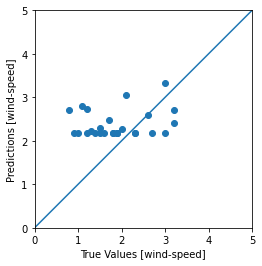

In [46]:
predictions = model2.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Two hidden layer analysis

In [47]:
model3.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 0s/step - loss: 5.6129 - mae: 2.2094 - mse: 5.6129 - mape: 95.8993
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 5.1335 - mae: 2.1050 - mse: 5.1335 - mape: 90.2792
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.8664 - mae: 2.0480 - mse: 4.8664 - mape: 89.2119
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.8557 - mae: 2.0394 - mse: 4.8557 - mape: 87.9702
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.3720 - mae: 1.8808 - mse: 4.3720 - mape: 80.0649
Epoch 6/1000
2/2 [==============================] - 0s 0s/step - loss: 4.0014 - mae: 1.8167 - mse: 4.0014 - mape: 78.2183
Epoch 7/1000
2/2 [==============================] - 0s 16ms/step - loss: 3.9729 - mae: 1.7991 - mse: 3.9729 - mape: 75.7655
Epoch 8/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.0089 - mae: 1.8089 - mse: 4.0089 - mape: 76.2113
Epoch 9/1000
2/2 

Epoch 66/1000
2/2 [==============================] - 0s 0s/step - loss: 1.2652 - mae: 0.9553 - mse: 1.2652 - mape: 44.0576
Epoch 67/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.8280 - mae: 1.0993 - mse: 1.8280 - mape: 47.8504
Epoch 68/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.2991 - mae: 0.8824 - mse: 1.2991 - mape: 38.1895
Epoch 69/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.4843 - mae: 1.0144 - mse: 1.4843 - mape: 52.1671
Epoch 70/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7308 - mae: 1.0346 - mse: 1.7308 - mape: 51.5908
Epoch 71/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.1043 - mae: 0.8017 - mse: 1.1043 - mape: 37.3454
Epoch 72/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.3007 - mae: 0.8271 - mse: 1.3007 - mape: 37.4489
Epoch 73/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9577 - mae: 0.7993 - mse: 0.9577 - mape: 38.0244
Epoch 74

2/2 [==============================] - 0s 8ms/step - loss: 1.2412 - mae: 0.9479 - mse: 1.2412 - mape: 43.6958
Epoch 131/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.0784 - mae: 0.8060 - mse: 1.0784 - mape: 40.4551
Epoch 132/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.9040 - mae: 0.7797 - mse: 0.9040 - mape: 40.3784
Epoch 133/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.1849 - mae: 0.9284 - mse: 1.1849 - mape: 44.5143
Epoch 134/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9610 - mae: 0.7891 - mse: 0.9610 - mape: 35.7431
Epoch 135/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9046 - mae: 0.7422 - mse: 0.9046 - mape: 38.8431
Epoch 136/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9628 - mae: 0.7535 - mse: 0.9628 - mape: 38.5113
Epoch 137/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.0453 - mae: 0.8674 - mse: 1.0453 - mape: 44.6177
Epoch 138/100

2/2 [==============================] - 0s 8ms/step - loss: 0.6652 - mae: 0.6760 - mse: 0.6652 - mape: 33.7200
Epoch 194/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8895 - mae: 0.7316 - mse: 0.8895 - mape: 34.3811
Epoch 195/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9911 - mae: 0.8099 - mse: 0.9911 - mape: 40.8440
Epoch 196/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7122 - mae: 0.6634 - mse: 0.7122 - mape: 32.5985
Epoch 197/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.9159 - mae: 0.7902 - mse: 0.9159 - mape: 37.9699
Epoch 198/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7321 - mae: 0.6837 - mse: 0.7321 - mape: 33.3594
Epoch 199/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8354 - mae: 0.6530 - mse: 0.8354 - mape: 30.2488
Epoch 200/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6996 - mae: 0.7006 - mse: 0.6996 - mape: 37.2074
Epoch 201/1

2/2 [==============================] - 0s 8ms/step - loss: 0.7487 - mae: 0.6591 - mse: 0.7487 - mape: 33.2668
Epoch 257/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7772 - mae: 0.6872 - mse: 0.7772 - mape: 33.5396
Epoch 258/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8319 - mae: 0.7078 - mse: 0.8319 - mape: 34.8296
Epoch 259/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7659 - mae: 0.7165 - mse: 0.7659 - mape: 39.1981
Epoch 260/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6815 - mae: 0.6818 - mse: 0.6815 - mape: 35.2653
Epoch 261/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5165 - mae: 0.5686 - mse: 0.5165 - mape: 29.4416
Epoch 262/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6013 - mae: 0.6398 - mse: 0.6013 - mape: 32.0867
Epoch 263/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5954 - mae: 0.5979 - mse: 0.5954 - mape: 29.3494
Epoch 264/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.5422 - mae: 0.5740 - mse: 0.5422 - mape: 31.0106
Epoch 321/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6991 - mae: 0.6828 - mse: 0.6991 - mape: 34.4021
Epoch 322/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7424 - mae: 0.6583 - mse: 0.7424 - mape: 34.4779
Epoch 323/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7693 - mae: 0.7045 - mse: 0.7693 - mape: 34.0891
Epoch 324/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6010 - mae: 0.6160 - mse: 0.6010 - mape: 29.9771
Epoch 325/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8760 - mae: 0.7096 - mse: 0.8760 - mape: 33.9598
Epoch 326/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5314 - mae: 0.6194 - mse: 0.5314 - mape: 33.1745
Epoch 327/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7011 - mae: 0.6660 - mse: 0.7011 - mape: 35.8884
Epoch 328/1000

Epoch 385/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6513 - mae: 0.5994 - mse: 0.6513 - mape: 30.1070
Epoch 386/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5039 - mae: 0.5817 - mse: 0.5039 - mape: 28.9196
Epoch 387/1000
2/2 [==============================] - ETA: 0s - loss: 0.4929 - mae: 0.5778 - mse: 0.4929 - mape: 31.539 - 0s 8ms/step - loss: 0.5902 - mae: 0.6143 - mse: 0.5902 - mape: 30.9708
Epoch 388/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6253 - mae: 0.6317 - mse: 0.6253 - mape: 32.2443
Epoch 389/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4725 - mae: 0.5476 - mse: 0.4725 - mape: 27.8762
Epoch 390/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6425 - mae: 0.6162 - mse: 0.6425 - mape: 31.0637
Epoch 391/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7451 - mae: 0.7232 - mse: 0.7451 - mape: 38.9795
Epoch 392/1000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 0.6076 - mae: 0.6007 - mse: 0.6076 - mape: 29.9109
Epoch 450/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5505 - mae: 0.6011 - mse: 0.5505 - mape: 30.9814
Epoch 451/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7315 - mae: 0.7017 - mse: 0.7315 - mape: 35.8448
Epoch 452/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6002 - mae: 0.6228 - mse: 0.6002 - mape: 31.0872
Epoch 453/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7734 - mae: 0.7270 - mse: 0.7734 - mape: 37.0355
Epoch 454/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8056 - mae: 0.6700 - mse: 0.8056 - mape: 31.6658
Epoch 455/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5622 - mae: 0.6088 - mse: 0.5622 - mape: 30.7230
Epoch 456/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5786 - mae: 0.6004 - mse: 0.5786 - mape: 28.8787
Epoch 457/1000

Epoch 514/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6232 - mae: 0.6664 - mse: 0.6232 - mape: 35.8562
Epoch 515/1000
2/2 [==============================] - ETA: 0s - loss: 0.5902 - mae: 0.6220 - mse: 0.5902 - mape: 33.745 - 0s 8ms/step - loss: 0.5877 - mae: 0.5991 - mse: 0.5877 - mape: 31.0946
Epoch 516/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5737 - mae: 0.6129 - mse: 0.5737 - mape: 33.2269
Epoch 517/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4718 - mae: 0.5520 - mse: 0.4718 - mape: 28.8471
Epoch 518/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6397 - mae: 0.6516 - mse: 0.6397 - mape: 35.3568
Epoch 519/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6995 - mae: 0.6299 - mse: 0.6995 - mape: 30.9507
Epoch 520/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7303 - mae: 0.6473 - mse: 0.7303 - mape: 34.0553
Epoch 521/1000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 0.7185 - mae: 0.7093 - mse: 0.7185 - mape: 36.0286
Epoch 579/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5419 - mae: 0.5956 - mse: 0.5419 - mape: 31.8275
Epoch 580/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4788 - mae: 0.5323 - mse: 0.4788 - mape: 27.9826
Epoch 581/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6675 - mae: 0.6230 - mse: 0.6675 - mape: 31.0618
Epoch 582/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5676 - mae: 0.6072 - mse: 0.5676 - mape: 32.0585
Epoch 583/1000
2/2 [==============================] - ETA: 0s - loss: 0.7673 - mae: 0.6128 - mse: 0.7673 - mape: 28.844 - 0s 8ms/step - loss: 0.6872 - mae: 0.5960 - mse: 0.6872 - mape: 29.5878
Epoch 584/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6263 - mae: 0.6499 - mse: 0.6263 - mape: 33.2252
Epoch 585/1000
2/2 [==============================] - 0s 8ms/step - loss

2/2 [==============================] - 0s 8ms/step - loss: 0.5880 - mae: 0.6250 - mse: 0.5880 - mape: 31.4434
Epoch 642/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5250 - mae: 0.5753 - mse: 0.5250 - mape: 28.6266
Epoch 643/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6550 - mae: 0.6077 - mse: 0.6550 - mape: 30.5456
Epoch 644/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6157 - mae: 0.6561 - mse: 0.6157 - mape: 33.8230
Epoch 645/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5144 - mae: 0.5812 - mse: 0.5144 - mape: 29.8216
Epoch 646/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5764 - mae: 0.6097 - mse: 0.5764 - mape: 30.8168
Epoch 647/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6038 - mae: 0.5928 - mse: 0.6038 - mape: 31.7673
Epoch 648/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4851 - mae: 0.5508 - mse: 0.4851 - mape: 27.5750
Epoch 649/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.6061 - mae: 0.6253 - mse: 0.6061 - mape: 33.5569
Epoch 705/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5743 - mae: 0.6088 - mse: 0.5743 - mape: 30.9339
Epoch 706/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6161 - mae: 0.5834 - mse: 0.6161 - mape: 28.8652
Epoch 707/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5750 - mae: 0.5998 - mse: 0.5750 - mape: 29.5848
Epoch 708/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6686 - mae: 0.6501 - mse: 0.6686 - mape: 32.8833
Epoch 709/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6075 - mae: 0.6109 - mse: 0.6075 - mape: 29.2727
Epoch 710/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5072 - mae: 0.5328 - mse: 0.5072 - mape: 26.8647
Epoch 711/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5322 - mae: 0.6169 - mse: 0.5322 - mape: 31.7231
Epoch 712/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.5513 - mae: 0.6451 - mse: 0.5513 - mape: 32.8014
Epoch 770/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4551 - mae: 0.5510 - mse: 0.4551 - mape: 29.3440
Epoch 771/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5207 - mae: 0.5813 - mse: 0.5207 - mape: 31.8729
Epoch 772/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5793 - mae: 0.5819 - mse: 0.5793 - mape: 28.7376
Epoch 773/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6638 - mae: 0.6385 - mse: 0.6638 - mape: 32.1870
Epoch 774/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7714 - mae: 0.6623 - mse: 0.7714 - mape: 32.6101
Epoch 775/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5392 - mae: 0.5735 - mse: 0.5392 - mape: 28.8406
Epoch 776/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5815 - mae: 0.6013 - mse: 0.5815 - mape: 30.9399
Epoch 777/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.5619 - mae: 0.6039 - mse: 0.5619 - mape: 30.1165
Epoch 835/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5369 - mae: 0.6118 - mse: 0.5369 - mape: 30.5107
Epoch 836/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4706 - mae: 0.5504 - mse: 0.4706 - mape: 28.9966
Epoch 837/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4504 - mae: 0.4962 - mse: 0.4504 - mape: 26.7551
Epoch 838/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4868 - mae: 0.5351 - mse: 0.4868 - mape: 28.6427
Epoch 839/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5396 - mae: 0.6318 - mse: 0.5396 - mape: 32.2087
Epoch 840/1000
2/2 [==============================] - 0s 0s/step - loss: 0.6319 - mae: 0.6277 - mse: 0.6319 - mape: 32.4585
Epoch 841/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5222 - mae: 0.5904 - mse: 0.5222 - mape: 31.0527
Epoch 842/1000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.4549 - mae: 0.5634 - mse: 0.4549 - mape: 28.5943
Epoch 900/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6255 - mae: 0.6509 - mse: 0.6255 - mape: 32.0546
Epoch 901/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5710 - mae: 0.5773 - mse: 0.5710 - mape: 28.2253
Epoch 902/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.7194 - mae: 0.6777 - mse: 0.7194 - mape: 33.4654
Epoch 903/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4820 - mae: 0.5307 - mse: 0.4820 - mape: 29.2771
Epoch 904/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5778 - mae: 0.5697 - mse: 0.5778 - mape: 30.3011
Epoch 905/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5412 - mae: 0.6196 - mse: 0.5412 - mape: 32.7466
Epoch 906/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6233 - mae: 0.6483 - mse: 0.6233 - mape: 31.7291
Epoch 907/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.5190 - mae: 0.6151 - mse: 0.5190 - mape: 30.2891
Epoch 965/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4971 - mae: 0.5608 - mse: 0.4971 - mape: 29.0314
Epoch 966/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.5491 - mae: 0.6272 - mse: 0.5491 - mape: 31.0427
Epoch 967/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4703 - mae: 0.5697 - mse: 0.4703 - mape: 28.5981
Epoch 968/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4738 - mae: 0.5437 - mse: 0.4738 - mape: 27.5324
Epoch 969/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5452 - mae: 0.5977 - mse: 0.5452 - mape: 30.4465
Epoch 970/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.4754 - mae: 0.5551 - mse: 0.4754 - mape: 30.2349
Epoch 971/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5705 - mae: 0.6122 - mse: 0.5705 - mape: 32.1857
Epoch 972/10

In [48]:
loss,mae,mse,mape=model3.evaluate(X_test,y_test)
print(f'loss:{loss},mae:{mae},mse:{mse},mape:{mape}')

1/1 [==============================] - 1s 976ms/step - loss: 0.5712 - mae: 0.6550 - mse: 0.5712 - mape: 44.8546
loss:0.5711824297904968,mae:0.655025839805603,mse:0.5711824297904968,mape:44.8546142578125


In [49]:
# Test the model after training
example_result = model3.predict(X_test)

## Compare the Actual values with the Predicted values

In [50]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(y_test[:10].to_string(index=False))

Predicted Values
[[1.8643634]
 [2.4995968]
 [2.1630545]
 [2.3435512]
 [2.060327 ]
 [1.982887 ]
 [2.2841856]
 [2.2975159]
 [1.9807963]
 [2.4757085]]

Actual Values
0.9
1.2
2.0
1.8
0.8
1.0
3.2
2.1
1.5
1.9


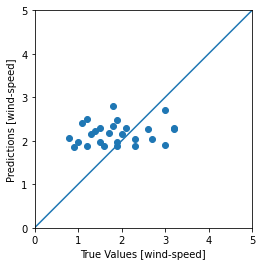

In [51]:
predictions = model3.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)